# **Fuel Consumption Data Science Project ⛽️**

----

**Installing Dependices 📚**

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn scipy


In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_selection import SelectFromModel, mutual_info_regression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
import joblib

**Loading Data 🗂️**

In [4]:
df = pd.read_csv('/content/Fuel_Consumption_2000-2022 (1).csv')
df.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


**Rename columns for consistency**

In [5]:
df.columns = [col.strip().replace(" ", "_").replace("(", "").replace(")", "").upper() for col in df.columns]
df.head()

,YEAR,MAKE,MODEL,VEHICLE_CLASS,ENGINE_SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL_CONSUMPTION,HWY_L/100_KM,COMB_L/100_KM,COMB_MPG,EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [6]:
df.shape

(22556, 13)

**Removing Null Values**

In [ ]:
print("Null values in the dataset:\n", df.isnull().sum())

# If any nulls exist, impute them using mean/median/mode based on the column type
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)  # Fill categorical with mode
        else:
            df[col].fillna(df[col].median(), inplace=True)  # Fill numerical with median

Null values in the dataset:
 YEAR                0
MAKE                0
MODEL               0
VEHICLE_CLASS       0
ENGINE_SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL_CONSUMPTION    0
HWY_L/100_KM        0
COMB_L/100_KM       0
COMB_MPG            0
EMISSIONS           0
dtype: int64


# **Plots 📊**
---
**Distribution Analysis**

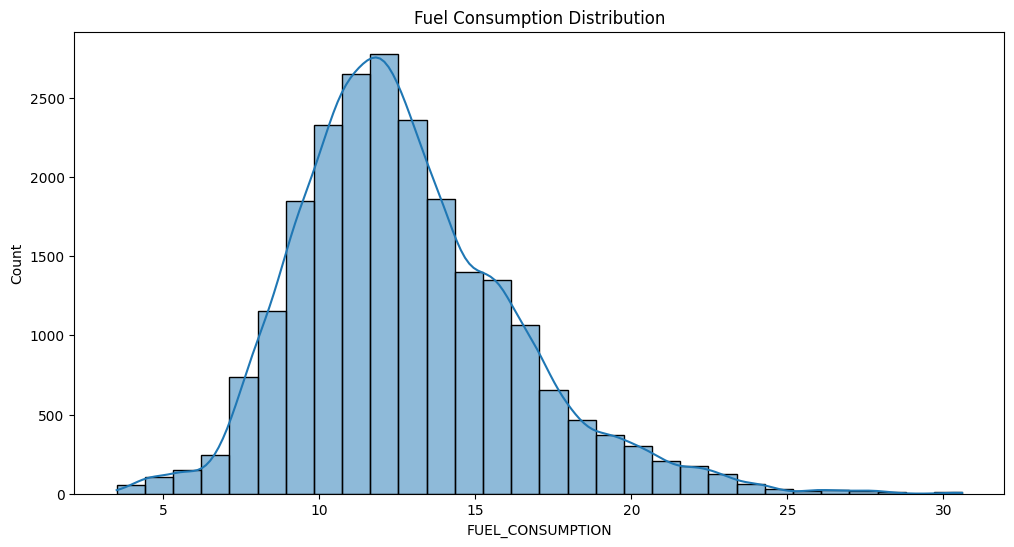

In [7]:
plt.figure(figsize=(12, 6))
sns.histplot(df["FUEL_CONSUMPTION"], kde=True, bins=30)
plt.title("Fuel Consumption Distribution")
plt.show()

**Adding Log transform for better distribution**

Skewness of FUEL_CONSUMPTION: 0.7608


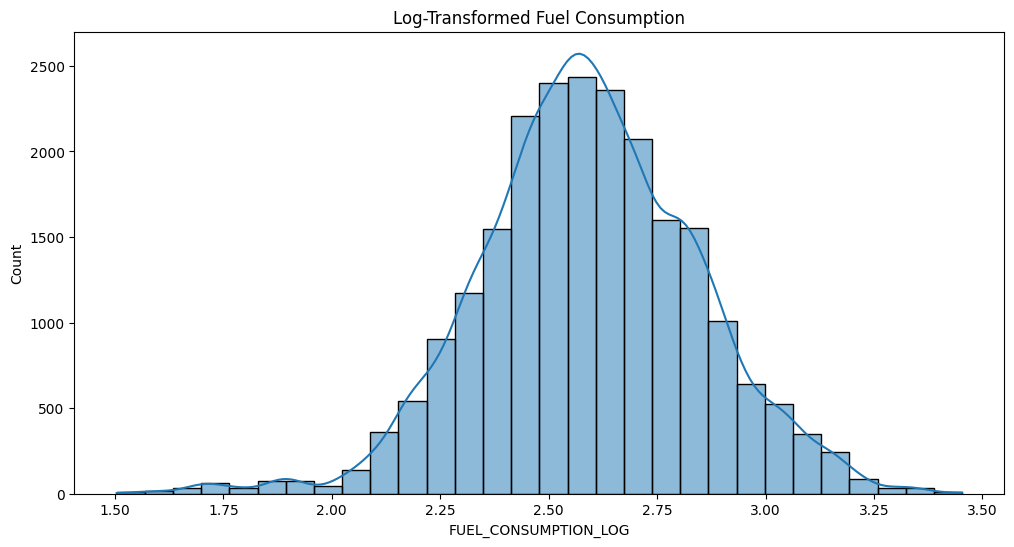

Skewness after log transform: -0.1595


In [11]:
skewness = skew(df["FUEL_CONSUMPTION"])
print(f"Skewness of FUEL_CONSUMPTION: {skewness:.4f}")

if abs(skewness) > 0.5:
    df["FUEL_CONSUMPTION_LOG"] = np.log1p(df["FUEL_CONSUMPTION"])
    plt.figure(figsize=(12, 6))
    sns.histplot(df["FUEL_CONSUMPTION_LOG"], kde=True, bins=30)
    plt.title("Log-Transformed Fuel Consumption")
    plt.show()
    print(f"Skewness after log transform: {skew(df['FUEL_CONSUMPTION_LOG']):.4f}")


In [12]:
print(df.columns.tolist())

['YEAR', 'MAKE', 'MODEL', 'VEHICLE_CLASS', 'ENGINE_SIZE', 'CYLINDERS', 'TRANSMISSION', 'FUEL', 'FUEL_CONSUMPTION', 'HWY_L/100_KM', 'COMB_L/100_KM', 'COMB_MPG', 'EMISSIONS', 'FUEL_CONSUMPTION_LOG']


**Distributions of other key numeric features**

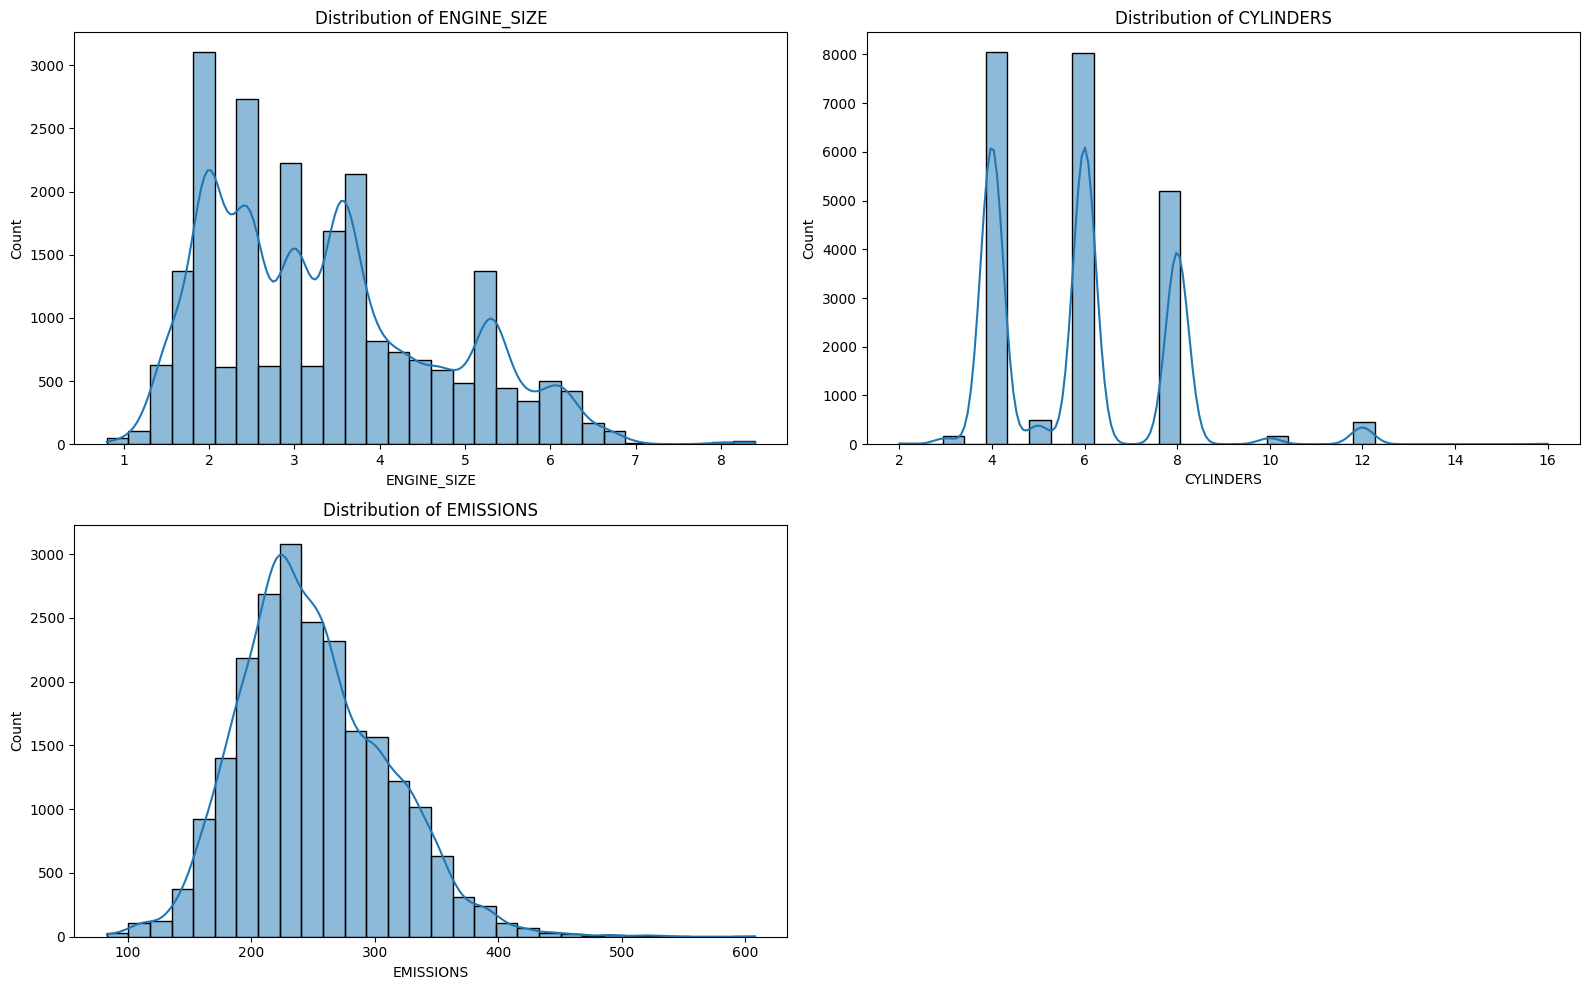

In [15]:
numeric_cols = []
for col in ["ENGINE_SIZE", "CYLINDERS"]:
    if col in df.columns:
        numeric_cols.append(col)

if "COMB_L_100_KM" in df.columns:
    numeric_cols.append("COMB_L_100_KM")
elif "COMB_L100_KM" in df.columns:
    numeric_cols.append("COMB_L100_KM")

if "EMISSIONS" in df.columns:
    numeric_cols.append("EMISSIONS")

# Plot distributions of available numeric columns
if numeric_cols:
    plt.figure(figsize=(16, 10))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(2, 2, i)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()
else:
    print("No matching numeric columns found to plot distributions")

**Check for Class Imbalance for categorical variables**

In [16]:
categorical_columns = ["FUEL", "TRANSMISSION", "VEHICLE_CLASS"]

<ipython-input-17-cdfbea11bd82>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")


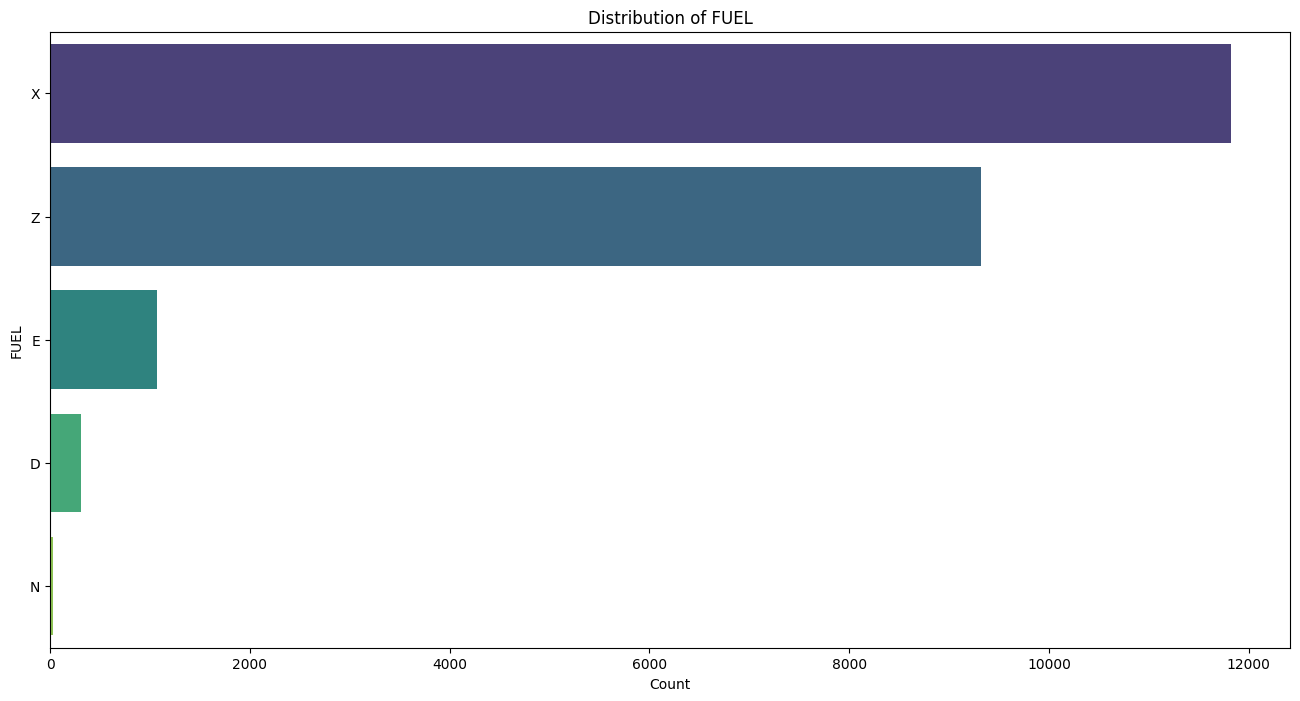

<ipython-input-17-cdfbea11bd82>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")


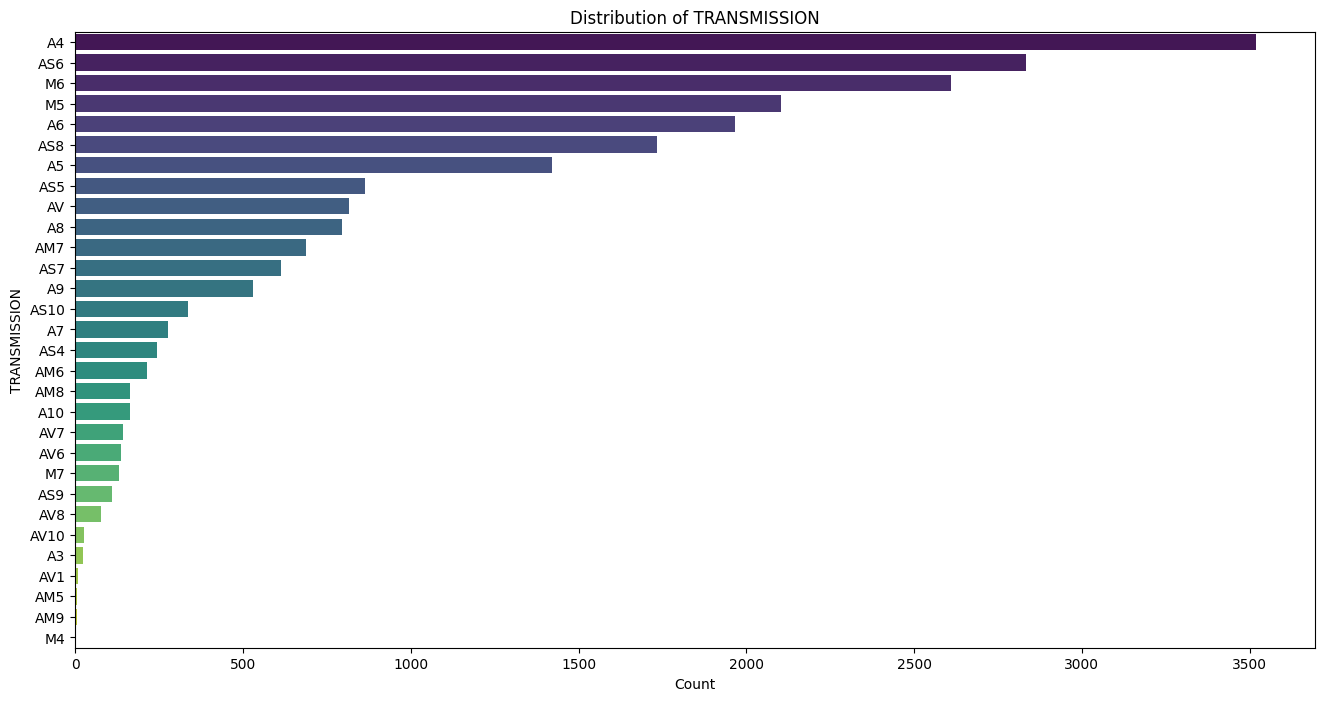

<ipython-input-17-cdfbea11bd82>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")


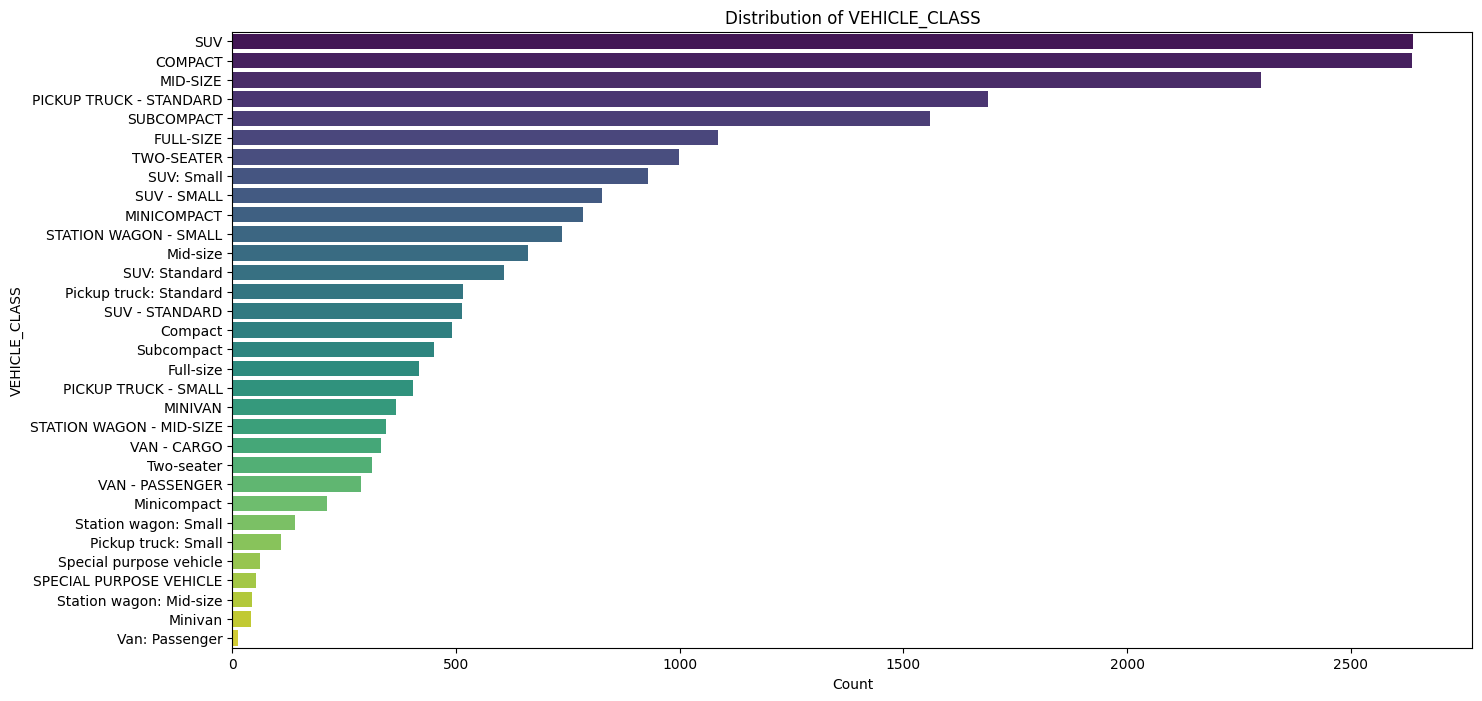

In [17]:
for col in categorical_columns:
    plt.figure(figsize=(16, 8))
    sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")
    plt.title(f"Distribution of {col}")
    plt.xlabel("Count")
    plt.show()


**Check distribution of MAKE (top 15 due to high cardinality)**

<ipython-input-18-98205283cc24>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_makes.index, x=top_makes.values, palette="viridis")


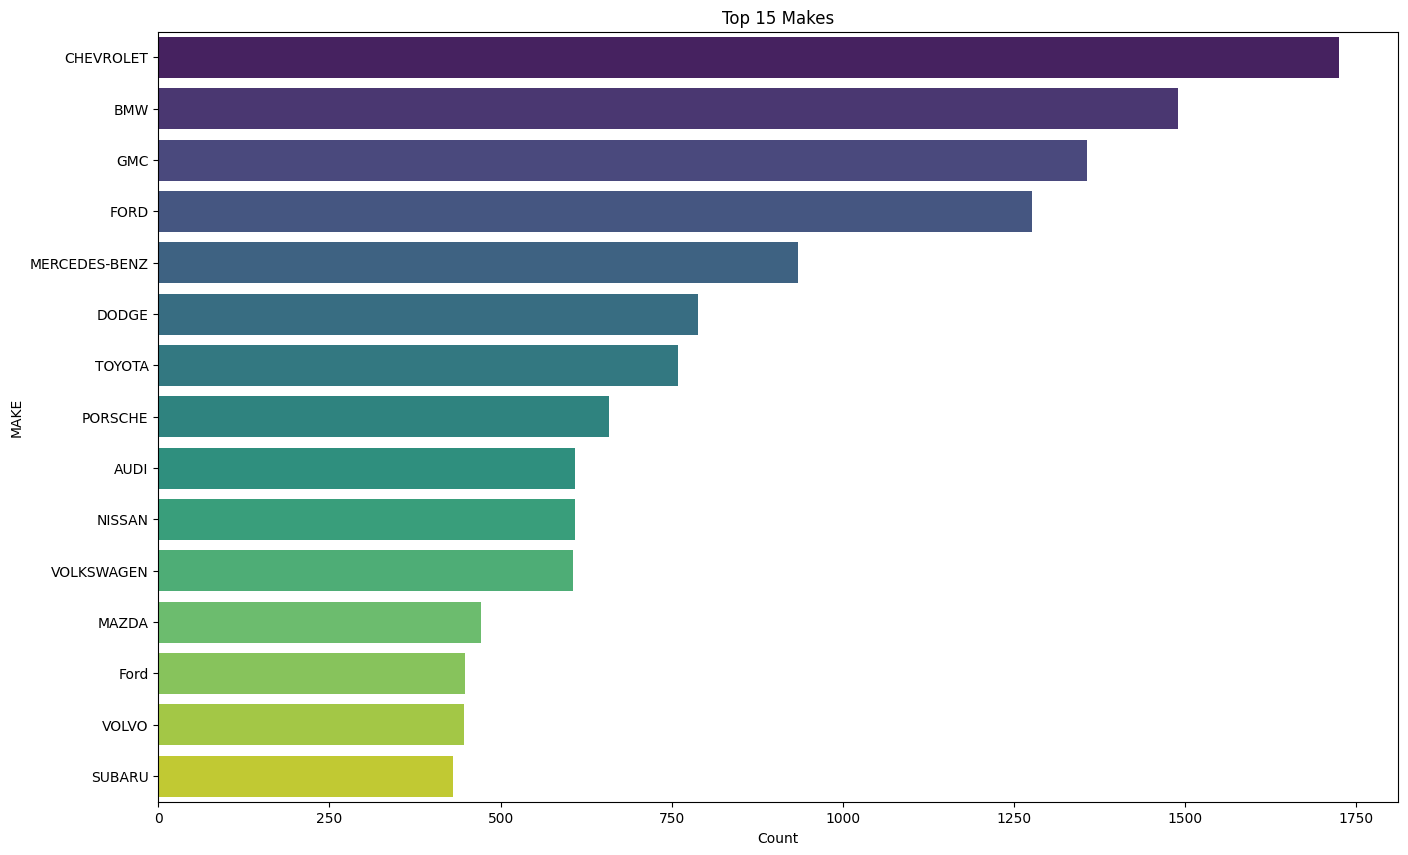

In [18]:
plt.figure(figsize=(16, 10))
top_makes = df["MAKE"].value_counts().sort_values(ascending=False).head(15)
sns.barplot(y=top_makes.index, x=top_makes.values, palette="viridis")
plt.title("Top 15 Makes")
plt.xlabel("Count")
plt.show()

**Balance each categorical column**

In [19]:
def balance_category(df, col):
    class_counts = df[col].value_counts()

    # Choose a reasonable target sample size
    # For high cardinality columns: use min count with a lower bound
    # For low cardinality columns: use median count
    if len(class_counts) > 10:
        # High cardinality - limit to a reasonable minimum
        min_sample_count = max(100, class_counts.min())
        max_samples = min(min_sample_count, 1000)  # Cap at 1000 samples per class
    else:
        # Low cardinality - use median
        max_samples = class_counts.median()

    print(f"Balancing {col} with target samples per class: {max_samples:.0f}")

    # Create a new balanced dataframe
    balanced_df = pd.DataFrame()

    # For each category, undersample or oversample as needed
    for category in class_counts.index:
        subset = df[df[col] == category]

        if len(subset) > max_samples:
            # Undersample
            subset = subset.sample(n=int(max_samples), replace=False, random_state=42)
        elif len(subset) < max_samples:
            # Oversample (only for critical classes with very few samples)
            if len(subset) < max_samples * 0.1:  # If class has less than 10% of target
                subset = subset.sample(n=int(max_samples), replace=True, random_state=42)

        balanced_df = pd.concat([balanced_df, subset])

    return balanced_df

In [20]:
df_balanced = df.copy()

In [21]:
df_balanced = balance_category(df_balanced, "FUEL")

Balancing FUEL with target samples per class: 1071


<ipython-input-24-1884ccd65dd2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["FUEL"], order=df["FUEL"].value_counts().index, palette="viridis")
<ipython-input-24-1884ccd65dd2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_balanced["FUEL"], order=df_balanced["FUEL"].value_counts().index, palette="viridis")


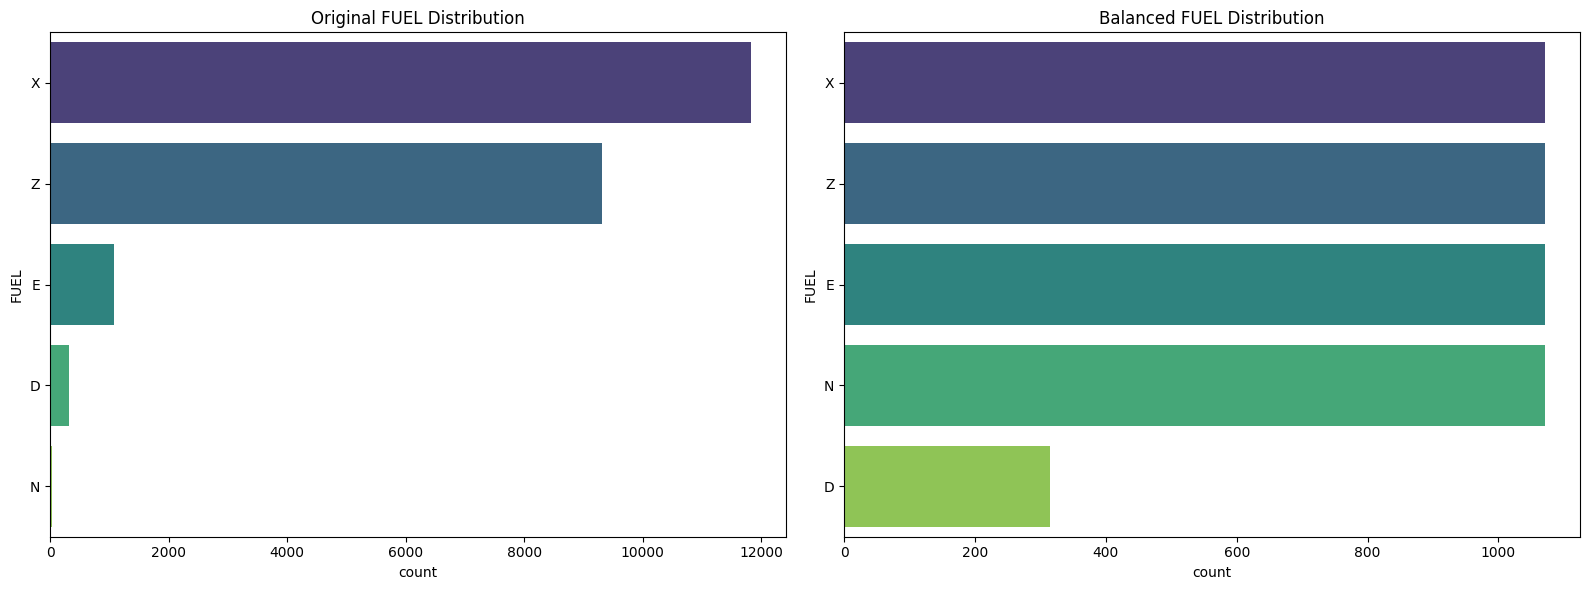

In [24]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.countplot(y=df["FUEL"], order=df["FUEL"].value_counts().index, palette="viridis")
plt.title("Original FUEL Distribution")

plt.subplot(1, 2, 2)
sns.countplot(y=df_balanced["FUEL"], order=df_balanced["FUEL"].value_counts().index, palette="viridis")
plt.title("Balanced FUEL Distribution")

plt.tight_layout()
plt.show()

In [25]:
print("Original dataset shape:", df.shape)
print("Balanced dataset shape:", df_balanced.shape)

Original dataset shape: (22556, 14)
Balanced dataset shape: (4598, 14)


**Time-Series Analysis for Fuel Consumption Trends**

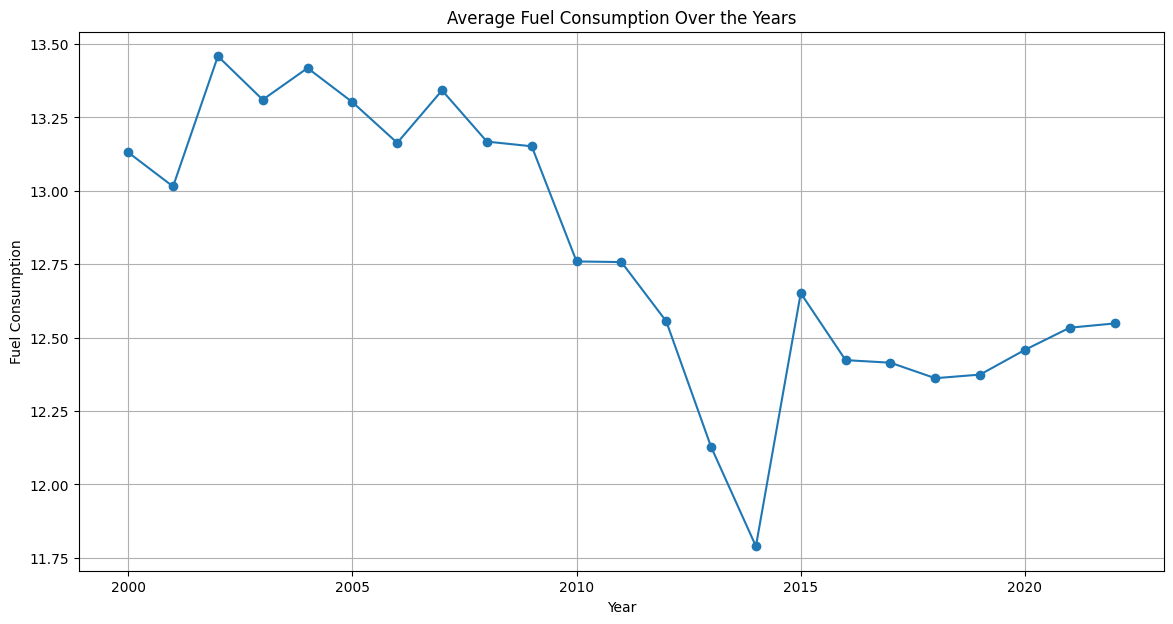

In [26]:
plt.figure(figsize=(14, 7))
yearly_consumption = df.groupby("YEAR")["FUEL_CONSUMPTION"].mean()
yearly_consumption.plot(kind="line", marker="o")
plt.title("Average Fuel Consumption Over the Years")
plt.xlabel("Year")
plt.ylabel("Fuel Consumption")
plt.grid(True)
plt.show()

**Analyze both fuel consumption and emissions over time**

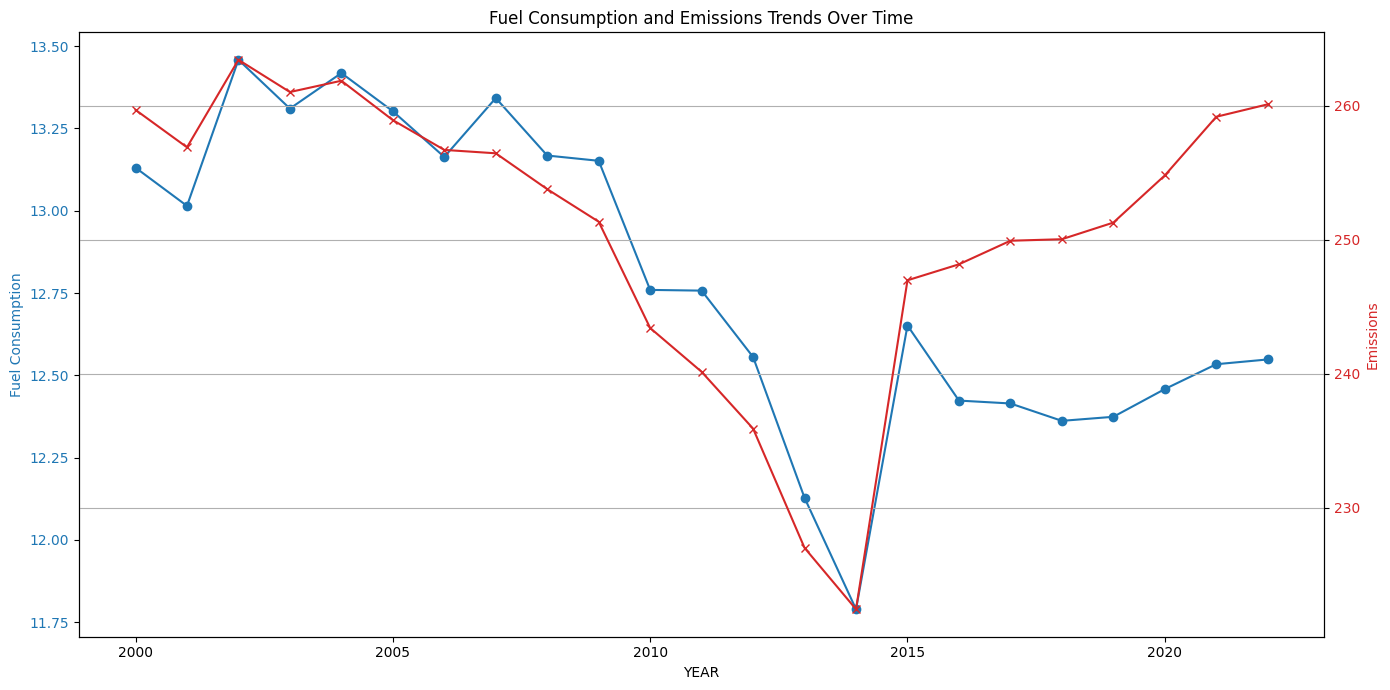

In [27]:
fig, ax1 = plt.subplots(figsize=(14, 7))

# Fuel consumption on left y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('Fuel Consumption', color='tab:blue')
yearly_consumption.plot(kind="line", marker="o", ax=ax1, color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Emissions on right y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Emissions', color='tab:red')
yearly_emissions = df.groupby("YEAR")["EMISSIONS"].mean()
yearly_emissions.plot(kind="line", marker="x", ax=ax2, color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title("Fuel Consumption and Emissions Trends Over Time")
plt.grid(True)
plt.tight_layout()
plt.show()

**Engine size trends over time**

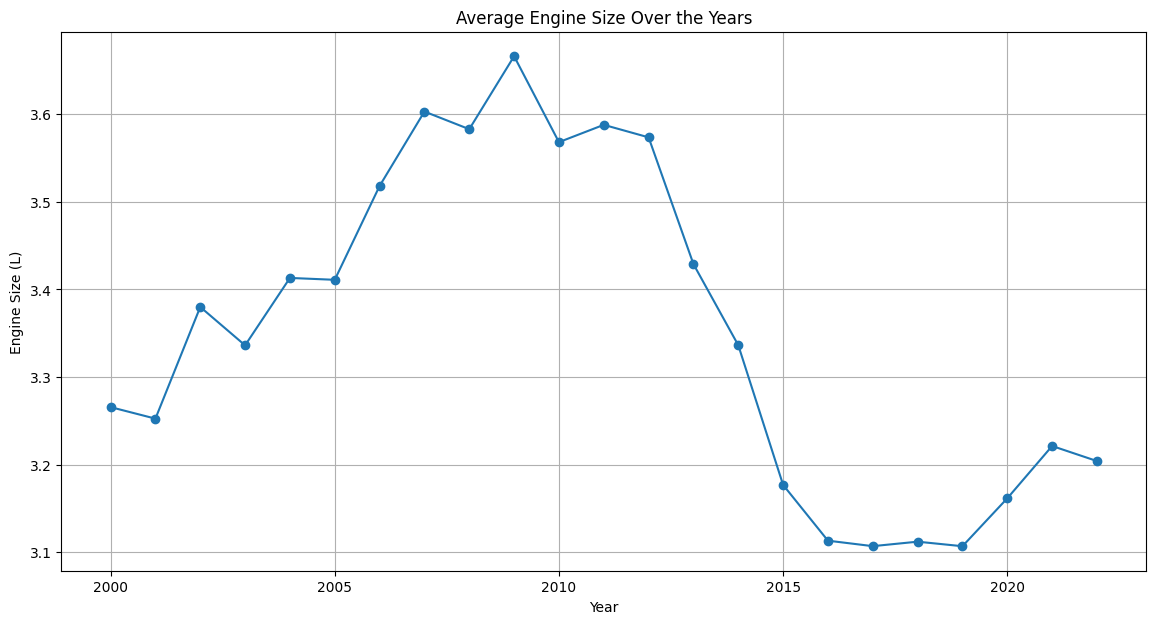

In [28]:
plt.figure(figsize=(14, 7))
yearly_engine_size = df.groupby("YEAR")["ENGINE_SIZE"].mean()
yearly_engine_size.plot(kind="line", marker="o")
plt.title("Average Engine Size Over the Years")
plt.xlabel("Year")
plt.ylabel("Engine Size (L)")
plt.grid(True)
plt.show()

# **outlier detection 🔎**

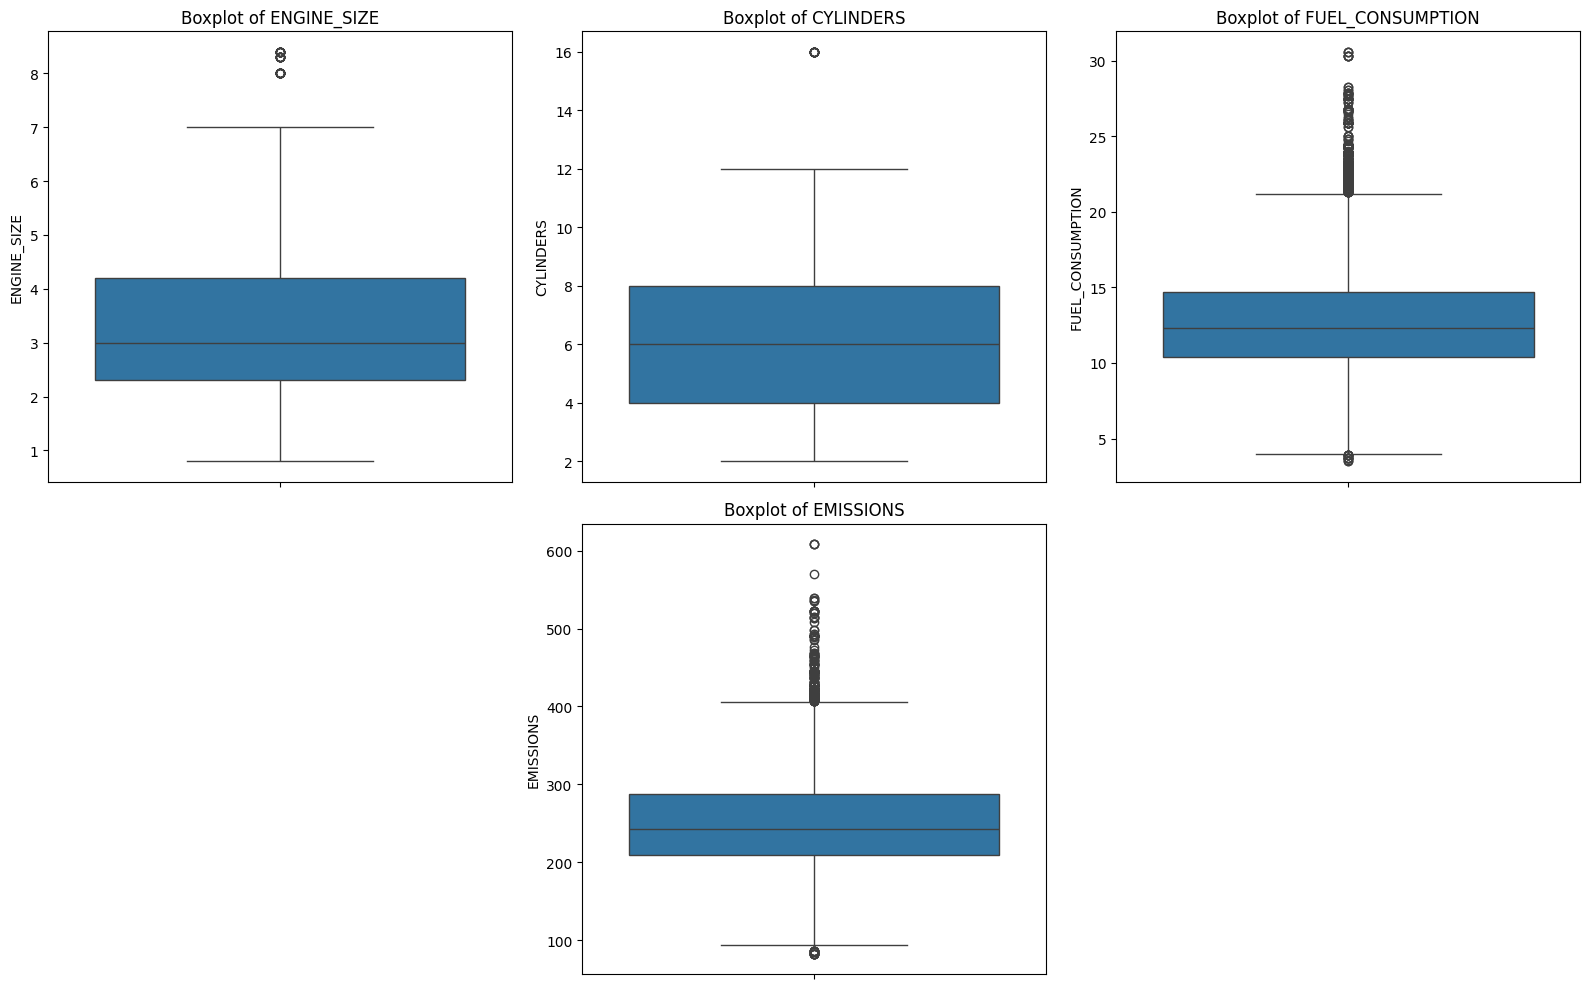

In [29]:
plt.figure(figsize=(16, 10))
numeric_columns = ["ENGINE_SIZE", "CYLINDERS", "FUEL_CONSUMPTION", "COMB_L_100_KM", "EMISSIONS"]

for i, col in enumerate(numeric_columns, 1):
    if col in df.columns:
        plt.subplot(2, 3, i)
        sns.boxplot(y=df[col])
        plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

In [30]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, len(outliers), lower_bound, upper_bound

In [31]:
print("Outlier Analysis:")
print("-" * 50)
for col in numeric_columns:
    if col in df.columns:
        outliers, count, lower, upper = detect_outliers(df, col)
        print(f"{col}: {count} outliers detected")
        print(f"   Range for normal values: [{lower:.2f}, {upper:.2f}]")
        print(f"   Min actual value: {df[col].min():.2f}, Max actual value: {df[col].max():.2f}")
        print("-" * 50)

Outlier Analysis:
--------------------------------------------------
ENGINE_SIZE: 41 outliers detected
   Range for normal values: [-0.55, 7.05]
   Min actual value: 0.80, Max actual value: 8.40
--------------------------------------------------
CYLINDERS: 12 outliers detected
   Range for normal values: [-2.00, 14.00]
   Min actual value: 2.00, Max actual value: 16.00
--------------------------------------------------
FUEL_CONSUMPTION: 517 outliers detected
   Range for normal values: [3.91, 21.21]
   Min actual value: 3.50, Max actual value: 30.60
--------------------------------------------------
EMISSIONS: 218 outliers detected
   Range for normal values: [90.50, 406.50]
   Min actual value: 83.00, Max actual value: 608.00
--------------------------------------------------


# **Advanced Feature Engineering 🔨**

---

In [33]:
print(df.columns.tolist())

['YEAR', 'MAKE', 'MODEL', 'VEHICLE_CLASS', 'ENGINE_SIZE', 'CYLINDERS', 'TRANSMISSION', 'FUEL', 'FUEL_CONSUMPTION', 'HWY_L/100_KM', 'COMB_L/100_KM', 'COMB_MPG', 'EMISSIONS', 'FUEL_CONSUMPTION_LOG']


**Time-based features**

In [34]:
df['DECADE'] = (df['YEAR'] // 10) * 10
df['MODEL_AGE'] = 2022 - df['YEAR']  # Age relative to the last year in dataset

**Engine and power-related features**

In [35]:
df['ENGINE_SIZE_PER_CYLINDER'] = df['ENGINE_SIZE'] / df['CYLINDERS'].replace(0, 1)  # Avoid division by zero
df['POWER_PROXY'] = df['ENGINE_SIZE'] * df['CYLINDERS']

**Check for combined fuel consumption column names**

In [36]:
comb_col = None
if 'COMB_L_100_KM' in df.columns:
    comb_col = 'COMB_L_100_KM'
elif 'COMB_L100_KM' in df.columns:
    comb_col = 'COMB_L100_KM'
# Try other possible variants
elif any(col for col in df.columns if 'COMB' in col and 'KM' in col):
    possible_cols = [col for col in df.columns if 'COMB' in col and 'KM' in col]
    comb_col = possible_cols[0]
    print(f"Found combined consumption column: {comb_col}")

Found combined consumption column: COMB_L/100_KM


**Create features that depend on combined fuel consumption**

In [37]:
if comb_col:
    df['ENGINE_EFFICIENCY'] = df[comb_col] / df['ENGINE_SIZE']

    # Check if EMISSIONS column exists
    if 'EMISSIONS' in df.columns:
        df['EMISSIONS_EFFICIENCY'] = df['EMISSIONS'] / df[comb_col]

**Transmission features**

In [38]:
df['TRANSMISSION_TYPE'] = df['TRANSMISSION'].str[0]  # First letter indicates type (A=Auto, M=Manual)
df['TRANSMISSION_GEARS'] = df['TRANSMISSION'].str[1:].replace('', '0')
df['TRANSMISSION_GEARS'] = pd.to_numeric(df['TRANSMISSION_GEARS'], errors='coerce').fillna(0).astype(int)
df['IS_AUTOMATIC'] = df['TRANSMISSION'].str.startswith('A').astype(int)
df['IS_MANUAL'] = df['TRANSMISSION'].str.startswith('M').astype(int)

**Vehicle class features**

In [39]:
suv_keywords = ['SUV', 'SPORT UTILITY']
df['IS_SUV'] = df['VEHICLE_CLASS'].apply(lambda x: 1 if any(keyword in str(x).upper() for keyword in suv_keywords) else 0)

truck_keywords = ['PICKUP', 'TRUCK']
df['IS_TRUCK'] = df['VEHICLE_CLASS'].apply(lambda x: 1 if any(keyword in str(x).upper() for keyword in truck_keywords) else 0)

compact_keywords = ['COMPACT', 'SMALL']
df['IS_COMPACT'] = df['VEHICLE_CLASS'].apply(lambda x: 1 if any(keyword in str(x).upper() for keyword in compact_keywords) else 0)


**Luxury brand feature**

In [40]:
luxury_brands = ['BMW', 'MERCEDES-BENZ', 'AUDI', 'LEXUS', 'PORSCHE', 'JAGUAR', 'MASERATI', 'FERRARI', 'LAMBORGHINI']
df['IS_LUXURY'] = df['MAKE'].isin(luxury_brands).astype(int)

# 6. Non-linear transformations for key numeric features
for col in ['ENGINE_SIZE', 'CYLINDERS', 'ENGINE_SIZE_PER_CYLINDER', 'POWER_PROXY']:
    df[f'LOG_{col}'] = np.log1p(df[col])
    df[f'{col}_SQUARED'] = df[col]**2

**Interaction features**

In [41]:
df['ENGINE_SIZE_X_YEAR'] = df['ENGINE_SIZE'] * (df['YEAR'] - 2000) / 22  # Normalized year
df['CYLINDERS_X_YEAR'] = df['CYLINDERS'] * (df['YEAR'] - 2000) / 22

**Fuel type specific encodings**

In [42]:
fuel_map = {'X': 'REGULAR', 'Z': 'PREMIUM'}
df['FUEL_TYPE'] = df['FUEL'].map(fuel_map)

**Simplified vehicle class grouping**

In [43]:
def simplify_vehicle_class(vc):
    vc = str(vc).upper()
    if any(k in vc for k in ['SUV', 'SPORT UTILITY']):
        return 'SUV'
    elif any(k in vc for k in ['PICKUP', 'TRUCK']):
        return 'TRUCK'
    elif any(k in vc for k in ['COMPACT', 'SMALL']):
        return 'COMPACT'
    elif any(k in vc for k in ['MID-SIZE', 'MIDSIZE']):
        return 'MID_SIZE'
    elif any(k in vc for k in ['FULL-SIZE', 'FULLSIZE', 'LARGE']):
        return 'FULL_SIZE'
    else:
        return 'OTHER'

In [44]:
df['VEHICLE_CLASS_SIMPLIFIED'] = df['VEHICLE_CLASS'].apply(simplify_vehicle_class)

In [45]:
df.shape

(22556, 40)

In [46]:
print([col for col in df.columns if col not in df.columns.tolist()[:13]])  # Assuming first 13 are original

['FUEL_CONSUMPTION_LOG', 'DECADE', 'MODEL_AGE', 'ENGINE_SIZE_PER_CYLINDER', 'POWER_PROXY', 'ENGINE_EFFICIENCY', 'EMISSIONS_EFFICIENCY', 'TRANSMISSION_TYPE', 'TRANSMISSION_GEARS', 'IS_AUTOMATIC', 'IS_MANUAL', 'IS_SUV', 'IS_TRUCK', 'IS_COMPACT', 'IS_LUXURY', 'LOG_ENGINE_SIZE', 'ENGINE_SIZE_SQUARED', 'LOG_CYLINDERS', 'CYLINDERS_SQUARED', 'LOG_ENGINE_SIZE_PER_CYLINDER', 'ENGINE_SIZE_PER_CYLINDER_SQUARED', 'LOG_POWER_PROXY', 'POWER_PROXY_SQUARED', 'ENGINE_SIZE_X_YEAR', 'CYLINDERS_X_YEAR', 'FUEL_TYPE', 'VEHICLE_CLASS_SIMPLIFIED']


In [47]:
df.head()

,YEAR,MAKE,MODEL,VEHICLE_CLASS,ENGINE_SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL_CONSUMPTION,HWY_L/100_KM,...,LOG_CYLINDERS,CYLINDERS_SQUARED,LOG_ENGINE_SIZE_PER_CYLINDER,ENGINE_SIZE_PER_CYLINDER_SQUARED,LOG_POWER_PROXY,POWER_PROXY_SQUARED,ENGINE_SIZE_X_YEAR,CYLINDERS_X_YEAR,FUEL_TYPE,VEHICLE_CLASS_SIMPLIFIED
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,...,1.609438,16,0.336472,0.160000,2.001480,40.96,0.0,0.0,REGULAR,COMPACT
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,...,1.609438,16,0.336472,0.160000,2.001480,40.96,0.0,0.0,REGULAR,COMPACT
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,...,1.945910,36,0.427444,0.284444,3.005683,368.64,0.0,0.0,PREMIUM,MID_SIZE
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,...,1.945910,36,0.459532,0.340278,3.091042,441.00,0.0,0.0,PREMIUM,MID_SIZE
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,...,1.609438,16,0.371564,0.202500,2.104134,51.84,0.0,0.0,REGULAR,COMPACT


# **Outlier Treatment 🧹**

---

**Apply capping**

In [48]:
def cap_outliers(df, columns):
    df_capped = df.copy()

    for col in columns:
        # Check if column exists
        if col not in df_capped.columns:
            print(f"Column '{col}' not found - skipping")
            continue

        Q1 = df_capped[col].quantile(0.25)
        Q3 = df_capped[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers before capping
        outliers_count = ((df_capped[col] < lower_bound) | (df_capped[col] > upper_bound)).sum()

        # Apply capping
        df_capped[col] = df_capped[col].clip(lower=lower_bound, upper=upper_bound)

        print(f"Capped {outliers_count} outliers in {col}")

    return df_capped

In [49]:
print(df.columns.tolist())

['YEAR', 'MAKE', 'MODEL', 'VEHICLE_CLASS', 'ENGINE_SIZE', 'CYLINDERS', 'TRANSMISSION', 'FUEL', 'FUEL_CONSUMPTION', 'HWY_L/100_KM', 'COMB_L/100_KM', 'COMB_MPG', 'EMISSIONS', 'FUEL_CONSUMPTION_LOG', 'DECADE', 'MODEL_AGE', 'ENGINE_SIZE_PER_CYLINDER', 'POWER_PROXY', 'ENGINE_EFFICIENCY', 'EMISSIONS_EFFICIENCY', 'TRANSMISSION_TYPE', 'TRANSMISSION_GEARS', 'IS_AUTOMATIC', 'IS_MANUAL', 'IS_SUV', 'IS_TRUCK', 'IS_COMPACT', 'IS_LUXURY', 'LOG_ENGINE_SIZE', 'ENGINE_SIZE_SQUARED', 'LOG_CYLINDERS', 'CYLINDERS_SQUARED', 'LOG_ENGINE_SIZE_PER_CYLINDER', 'ENGINE_SIZE_PER_CYLINDER_SQUARED', 'LOG_POWER_PROXY', 'POWER_PROXY_SQUARED', 'ENGINE_SIZE_X_YEAR', 'CYLINDERS_X_YEAR', 'FUEL_TYPE', 'VEHICLE_CLASS_SIMPLIFIED']


In [50]:
comb_column = None
if 'COMB_L_100_KM' in df.columns:
    comb_column = 'COMB_L_100_KM'
elif 'COMB_L100_KM' in df.columns:
    comb_column = 'COMB_L100_KM'
# Try other possible variants
elif any(col for col in df.columns if 'COMB' in col and ('KM' in col or 'L' in col)):
    possible_cols = [col for col in df.columns if 'COMB' in col and ('KM' in col or 'L' in col)]
    comb_column = possible_cols[0]
    print(f"Found combined consumption column: {comb_column}")

Found combined consumption column: COMB_L/100_KM


In [51]:
numeric_for_capping = ['ENGINE_SIZE', 'CYLINDERS', 'FUEL_CONSUMPTION']

In [52]:
if comb_column:
    numeric_for_capping.append(comb_column)

# Add emissions if it exists
if 'EMISSIONS' in df.columns:
    numeric_for_capping.append('EMISSIONS')

# Cap outliers in key numeric columns
df_processed = cap_outliers(df, numeric_for_capping)

Capped 41 outliers in ENGINE_SIZE
Capped 12 outliers in CYLINDERS
Capped 517 outliers in FUEL_CONSUMPTION
Capped 548 outliers in COMB_L/100_KM
Capped 218 outliers in EMISSIONS


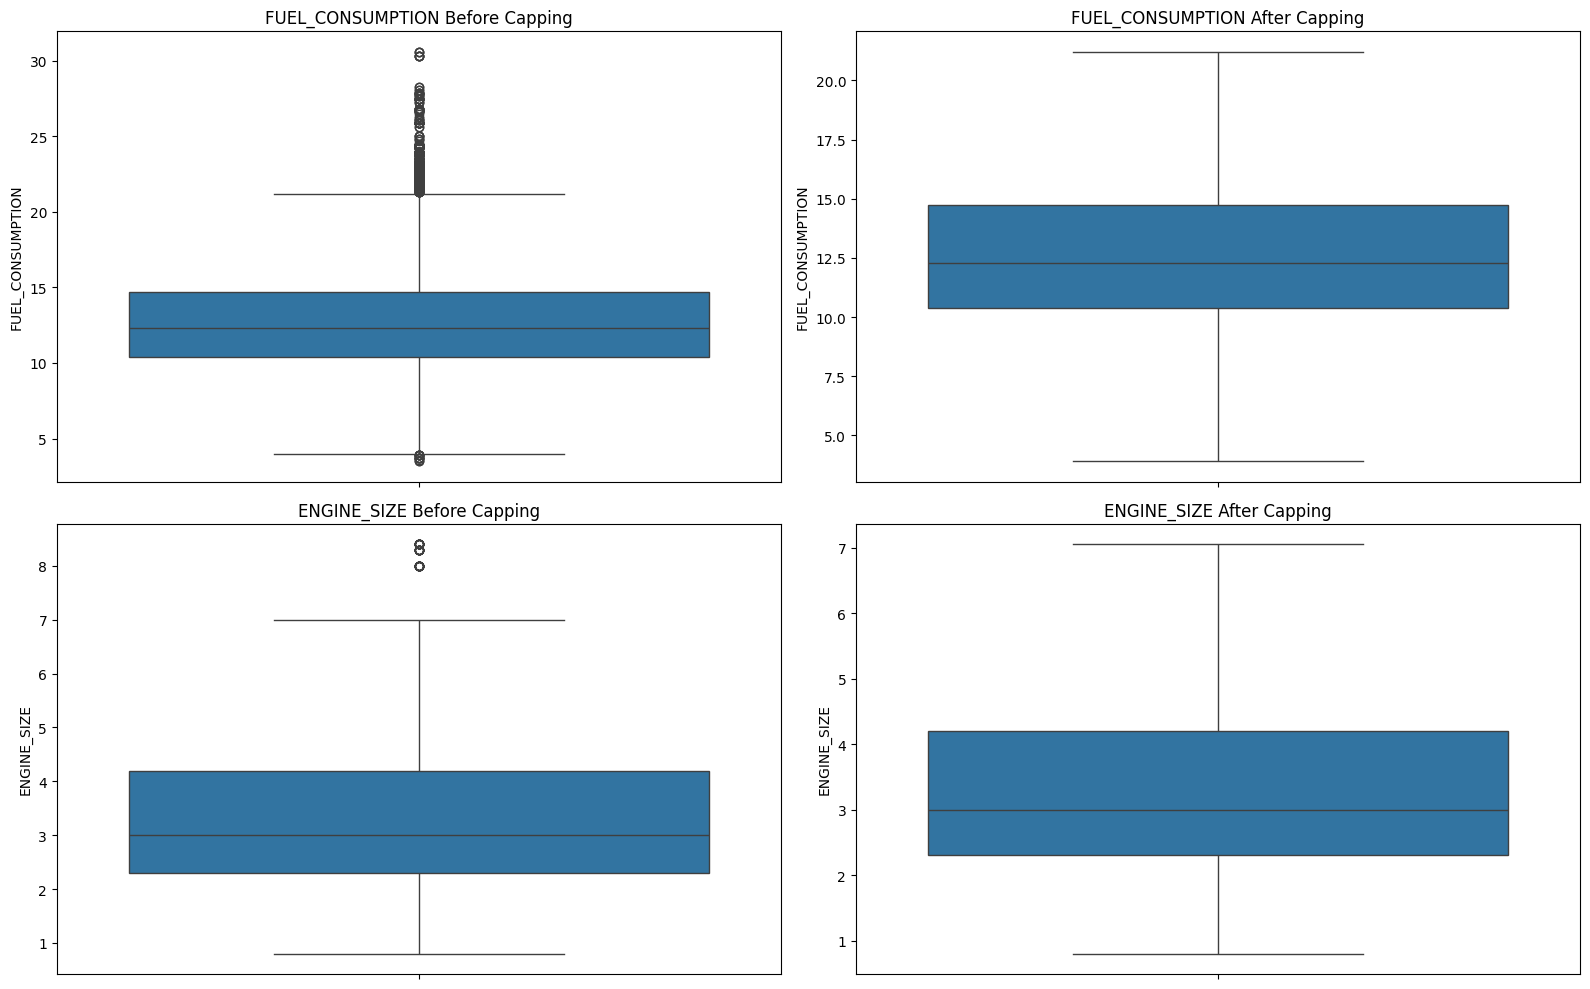

In [54]:
cols_to_visualize = ['FUEL_CONSUMPTION', 'ENGINE_SIZE']
plt.figure(figsize=(16, 10))

for i, col in enumerate(cols_to_visualize):
    # Before capping
    plt.subplot(2, 2, i*2+1)
    sns.boxplot(y=df[col])
    plt.title(f"{col} Before Capping")

    # After capping
    plt.subplot(2, 2, i*2+2)
    sns.boxplot(y=df_processed[col])
    plt.title(f"{col} After Capping")

plt.tight_layout()
plt.show()

# **Correlation Analysis 📊**

----

In [55]:
numeric_df = df_processed.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

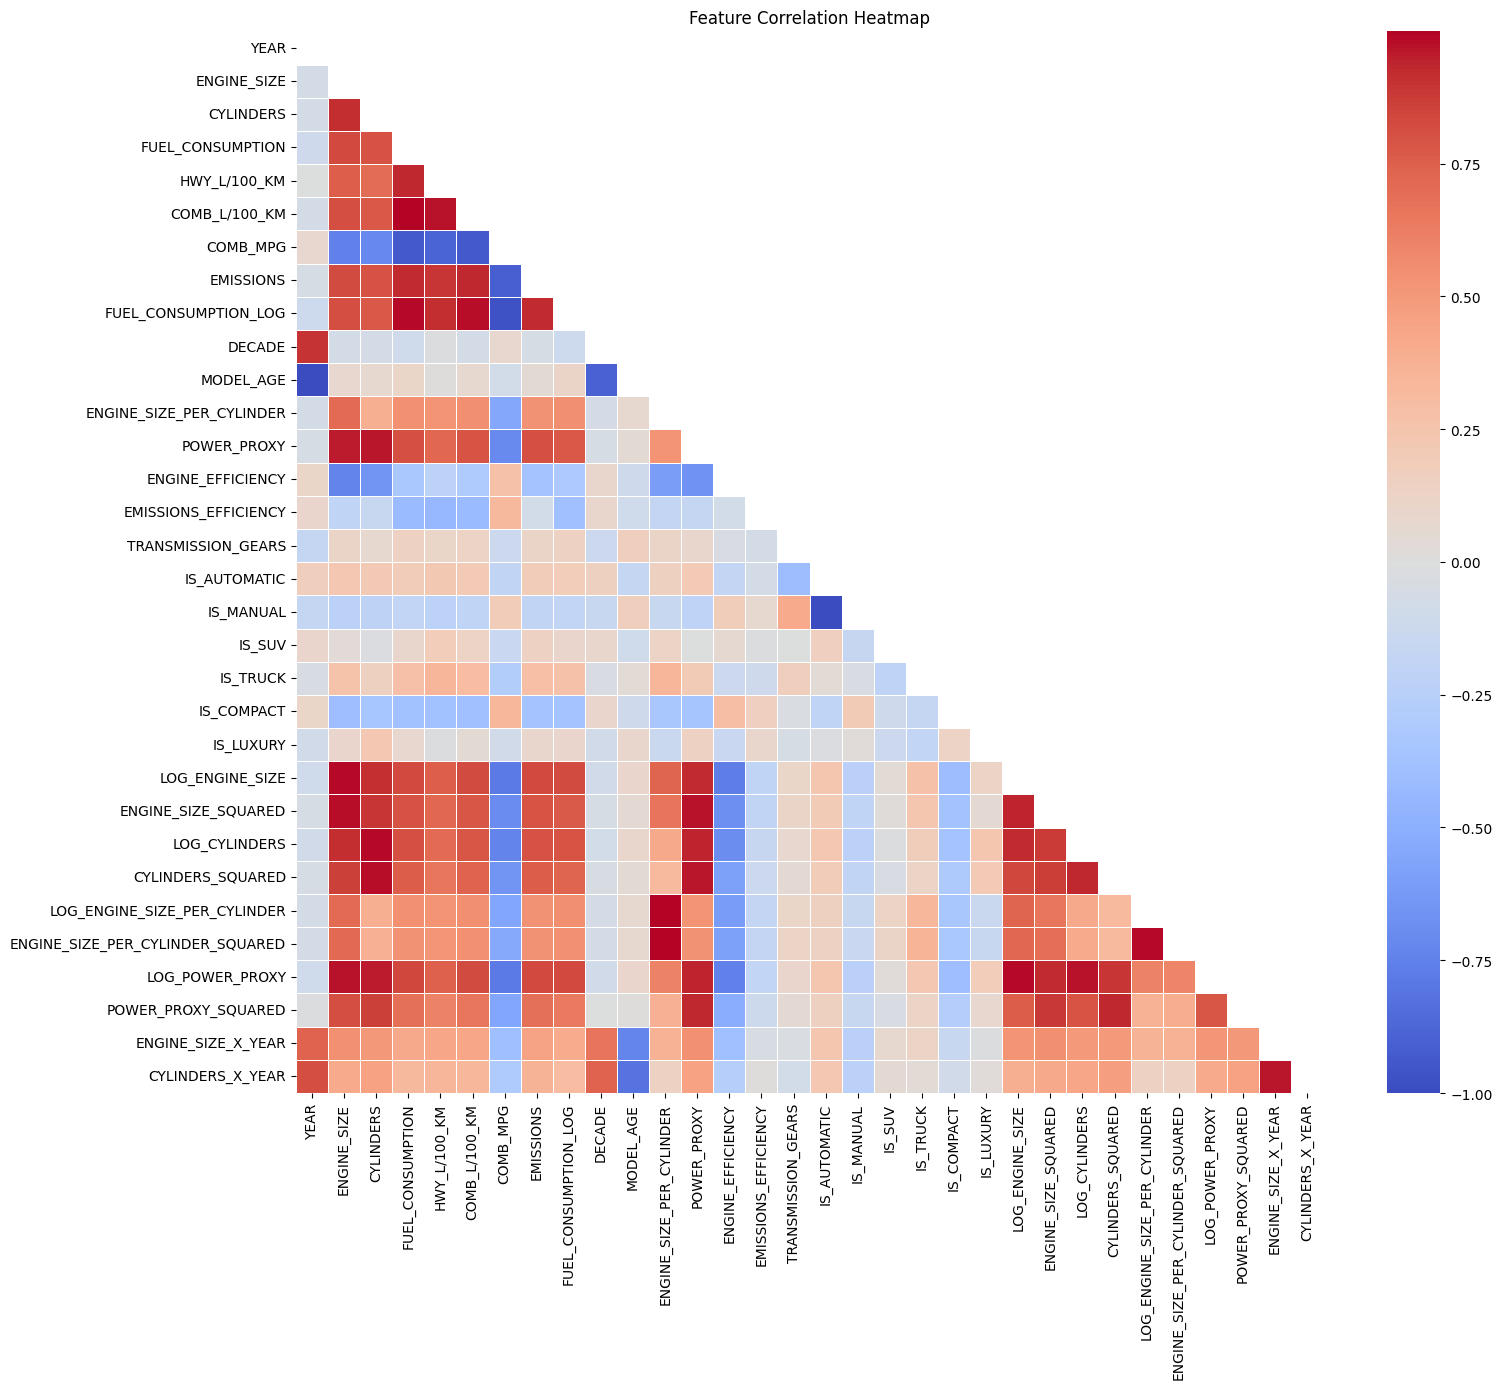

In [56]:
plt.figure(figsize=(16, 14))
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=False, mask=mask, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

**Find features with highest correlation to target variable**

In [57]:
target_correlations = correlation_matrix['FUEL_CONSUMPTION'].sort_values(ascending=False)

In [58]:
print("Top 10 features correlated with FUEL_CONSUMPTION:")
print(target_correlations.head(11))  # Include FUEL_CONSUMPTION itself

Top 10 features correlated with FUEL_CONSUMPTION:
FUEL_CONSUMPTION        1.000000
COMB_L/100_KM           0.992974
FUEL_CONSUMPTION_LOG    0.985803
HWY_L/100_KM            0.936501
EMISSIONS               0.926738
LOG_POWER_PROXY         0.836982
LOG_ENGINE_SIZE         0.834178
ENGINE_SIZE             0.831131
POWER_PROXY             0.808326
LOG_CYLINDERS           0.806731
CYLINDERS               0.801145
Name: FUEL_CONSUMPTION, dtype: float64


**Find highly correlated features**

In [59]:
threshold = 0.9
high_corr_pairs = []

In [61]:
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

print("\nHighly correlated feature pairs (>0.9):")
for var1, var2, corr in high_corr_pairs:
    print(f"{var1} - {var2}: {corr:.3f}")
    print("--" * 50)


Highly correlated feature pairs (>0.9):
CYLINDERS - ENGINE_SIZE: 0.914
----------------------------------------------------------------------------------------------------
HWY_L/100_KM - FUEL_CONSUMPTION: 0.937
----------------------------------------------------------------------------------------------------
COMB_L/100_KM - FUEL_CONSUMPTION: 0.993
----------------------------------------------------------------------------------------------------
COMB_L/100_KM - HWY_L/100_KM: 0.968
----------------------------------------------------------------------------------------------------
COMB_MPG - FUEL_CONSUMPTION: -0.934
----------------------------------------------------------------------------------------------------
COMB_MPG - COMB_L/100_KM: -0.934
----------------------------------------------------------------------------------------------------
EMISSIONS - FUEL_CONSUMPTION: 0.927
----------------------------------------------------------------------------------------------------
E

**Identify features to drop due to high correlation**

In [62]:
to_drop = []
for var1, var2, corr in high_corr_pairs:
    # If either variable is already in the drop list, skip
    if var1 in to_drop or var2 in to_drop:
        continue

    # If one is the target variable, keep the target and drop the other
    if var1 == 'FUEL_CONSUMPTION':
        to_drop.append(var2)
    elif var2 == 'FUEL_CONSUMPTION':
        to_drop.append(var1)
    else:
        # Check which one has lower correlation with target
        corr1 = abs(correlation_matrix.loc[var1, 'FUEL_CONSUMPTION'])
        corr2 = abs(correlation_matrix.loc[var2, 'FUEL_CONSUMPTION'])
        to_drop.append(var1 if corr1 < corr2 else var2)

In [63]:
print("Features to drop due to high correlation:")
print(to_drop)

Features to drop due to high correlation:
['CYLINDERS', 'HWY_L/100_KM', 'COMB_L/100_KM', 'COMB_MPG', 'EMISSIONS', 'FUEL_CONSUMPTION_LOG', 'YEAR', 'POWER_PROXY', 'IS_AUTOMATIC', 'ENGINE_SIZE', 'ENGINE_SIZE_SQUARED', 'LOG_CYLINDERS', 'ENGINE_SIZE_PER_CYLINDER', 'ENGINE_SIZE_PER_CYLINDER_SQUARED', 'LOG_ENGINE_SIZE', 'POWER_PROXY_SQUARED', 'CYLINDERS_X_YEAR']


In [ ]:
categories_to_drop = ['D', 'E', 'N']
df_processed = df_processed[~df_processed['FUEL'].isin(categories_to_drop)]

# **Encoding 🔑**

----

In [69]:
df_encoded = df_processed.copy()

**Label Encoding for ordinal variables**

In [70]:
ordinal_columns = ['TRANSMISSION_TYPE', 'FUEL']
label_encoders = {}

for col in ordinal_columns:
    if col in df_encoded.columns:
        le = LabelEncoder()
        df_encoded[f'{col}_ENCODED'] = le.fit_transform(df_encoded[col])
        label_encoders[col] = le

        # Print mapping for reference
        print(f"Label Encoding for {col}:")
        for i, category in enumerate(le.classes_):
            print(f"  {category}: {i}")

Label Encoding for TRANSMISSION_TYPE:
  A: 0
  M: 1
Label Encoding for FUEL:
  X: 0
  Z: 1


**One-Hot Encoding for nominal variables**

In [71]:
nominal_columns = ['VEHICLE_CLASS_SIMPLIFIED', 'FUEL_TYPE']

In [72]:
for col in nominal_columns:
    if col in df_encoded.columns:
        dummies = pd.get_dummies(df_encoded[col], prefix=col, drop_first=True)
        df_encoded = pd.concat([df_encoded, dummies], axis=1)
        print(f"One-hot encoded {col} into {dummies.shape[1]} features")

One-hot encoded VEHICLE_CLASS_SIMPLIFIED into 5 features
One-hot encoded FUEL_TYPE into 1 features


**Keep top 15 makes**

In [73]:
top_makes_count = 15  # Keep top 15 makes
top_makes = df_encoded['MAKE'].value_counts().nlargest(top_makes_count).index.tolist()
df_encoded['MAKE_GROUPED'] = df_encoded['MAKE'].apply(lambda x: x if x in top_makes else 'OTHER')
make_dummies = pd.get_dummies(df_encoded['MAKE_GROUPED'], prefix='MAKE', drop_first=True)
df_encoded = pd.concat([df_encoded, make_dummies], axis=1)
print(f"One-hot encoded top {top_makes_count} MAKE categories into {make_dummies.shape[1]} features")

One-hot encoded top 15 MAKE categories into 15 features


In [74]:
df_encoded.shape

(21138, 64)

# **Feature Selection 🧩**

---

**Target**

In [76]:
target_col = 'FUEL_CONSUMPTION'
y = df_processed[target_col]

**Remove original categorical columns that have been encoded**

In [77]:
cols_to_exclude = ['MAKE', 'MODEL', 'VEHICLE_CLASS', 'TRANSMISSION', 'FUEL', 'TRANSMISSION_TYPE', 'FUEL_TYPE',
                  'VEHICLE_CLASS_SIMPLIFIED', 'MAKE_GROUPED', target_col]

In [78]:
if 'to_drop' in locals():
    cols_to_exclude.extend(to_drop)

**Use only numeric columns for feature selection**

In [80]:
numeric_features = df_processed.select_dtypes(include=['number']).columns.tolist()
features = [col for col in numeric_features if col not in cols_to_exclude]

In [81]:
X = df_processed[features]
print(f"Features shape after preliminary selection: {X.shape}")
print("Selected features:", features)

Features shape after preliminary selection: (21138, 14)
Selected features: ['DECADE', 'MODEL_AGE', 'ENGINE_EFFICIENCY', 'EMISSIONS_EFFICIENCY', 'TRANSMISSION_GEARS', 'IS_MANUAL', 'IS_SUV', 'IS_TRUCK', 'IS_COMPACT', 'IS_LUXURY', 'CYLINDERS_SQUARED', 'LOG_ENGINE_SIZE_PER_CYLINDER', 'LOG_POWER_PROXY', 'ENGINE_SIZE_X_YEAR']


**Check that we have only numeric data**

In [82]:
print(X.dtypes.value_counts())

int64      9
float64    5
Name: count, dtype: int64


**Random Forest to assess feature importance**

In [83]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)


In [84]:
rf.fit(X, y)

RandomForestRegressor(random_state=42)

In [85]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

In [86]:
feature_importances.head(20)

,Feature,Importance
12,LOG_POWER_PROXY,0.785035
2,ENGINE_EFFICIENCY,0.158664
11,LOG_ENGINE_SIZE_PER_CYLINDER,0.045117
13,ENGINE_SIZE_X_YEAR,0.001858
4,TRANSMISSION_GEARS,0.001768
3,EMISSIONS_EFFICIENCY,0.001746
10,CYLINDERS_SQUARED,0.001568
1,MODEL_AGE,0.001450
6,IS_SUV,0.000863
9,IS_LUXURY,0.000687


**Calculate mutual information for feature selection**

In [88]:
mi_scores = mutual_info_regression(X, y, random_state=42)
mi_df = pd.DataFrame({
    'Feature': X.columns,
    'MI_Score': mi_scores
}).sort_values('MI_Score', ascending=False)

In [89]:
mi_df.head(20)

,Feature,MI_Score
2,ENGINE_EFFICIENCY,1.931243
3,EMISSIONS_EFFICIENCY,1.808455
12,LOG_POWER_PROXY,1.088826
11,LOG_ENGINE_SIZE_PER_CYLINDER,0.710612
13,ENGINE_SIZE_X_YEAR,0.678564
10,CYLINDERS_SQUARED,0.659740
4,TRANSMISSION_GEARS,0.105943
1,MODEL_AGE,0.099085
8,IS_COMPACT,0.085146
7,IS_TRUCK,0.062855


**Visualize MI scores**

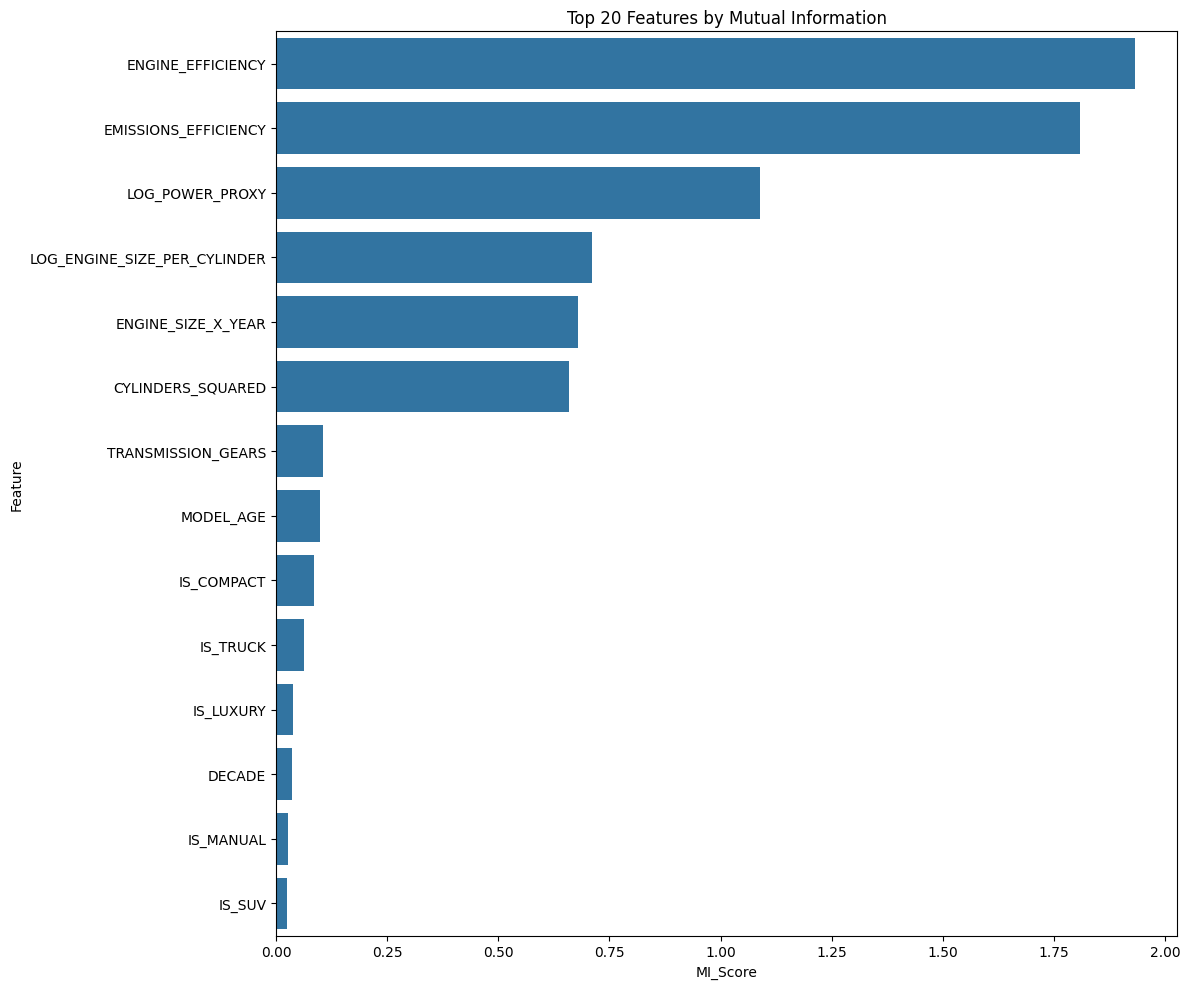

In [90]:
plt.figure(figsize=(12, 10))
sns.barplot(x='MI_Score', y='Feature', data=mi_df.head(20))
plt.title('Top 20 Features by Mutual Information')
plt.tight_layout()
plt.show()

**Select top features for modeling (combine RF importance and MI)**

In [91]:
def normalize_scores(scores):
    return (scores - scores.min()) / (scores.max() - scores.min())

In [92]:
feature_importances['Normalized_Importance'] = normalize_scores(feature_importances['Importance'])
mi_df['Normalized_MI'] = normalize_scores(mi_df['MI_Score'])

In [93]:
combined_scores = pd.merge(feature_importances, mi_df, on='Feature')
combined_scores['Combined_Score'] = 0.5 * combined_scores['Normalized_Importance'] + 0.5 * combined_scores['Normalized_MI']
combined_scores = combined_scores.sort_values('Combined_Score', ascending=False)

In [94]:
combined_scores[['Feature', 'Combined_Score']].head(20)

,Feature,Combined_Score
0,LOG_POWER_PROXY,0.779046
1,ENGINE_EFFICIENCY,0.600971
5,EMISSIONS_EFFICIENCY,0.468801
2,LOG_ENGINE_SIZE_PER_CYLINDER,0.208482
3,ENGINE_SIZE_X_YEAR,0.172517
6,CYLINDERS_SQUARED,0.167396
4,TRANSMISSION_GEARS,0.022270
7,MODEL_AGE,0.020268
11,IS_COMPACT,0.015915
12,IS_TRUCK,0.010047


**Select top features for the model**

*In the model we pick 5*

In [95]:
top_n_features = 5
selected_features = combined_scores.head(top_n_features)['Feature'].tolist()

In [97]:
print(f"Selected {len(selected_features)} features for modeling")
X_selected = X[selected_features]
print("Final feature set shape:", X_selected.shape)

Selected 5 features for modeling
Final feature set shape: (21138, 5)


# **Train/Test Split ✂️**

---

**Create bins for stratification**

In [98]:
df_encoded['ENGINE_SIZE_BIN'] = pd.qcut(df_encoded['ENGINE_SIZE'], 4, labels=False)
df_encoded['YEAR_BIN'] = pd.qcut(df_encoded['YEAR'], 4, labels=False)
df_encoded['STRAT_COL'] = df_encoded['ENGINE_SIZE_BIN'].astype(str) + '_' + df_encoded['YEAR_BIN'].astype(str)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y,
    test_size=0.2,
    random_state=42,
    stratify=df_encoded.loc[X_selected.index, 'STRAT_COL']
)


In [100]:
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (16910, 5)
Testing set shape: (4228, 5)


In [101]:
print("\nYear distribution in train set:", pd.Series(df_encoded.loc[X_train.index, 'YEAR']).value_counts().sort_index().head())
print("Year distribution in test set:", pd.Series(df_encoded.loc[X_test.index, 'YEAR']).value_counts().sort_index().head())



Year distribution in train set: YEAR
2000    509
2001    541
2002    567
2003    631
2004    665
Name: count, dtype: int64
Year distribution in test set: YEAR
2000    121
2001    124
2002    141
2003    158
2004    194
Name: count, dtype: int64


In [102]:
print("\nEngine size statistics - Train set:", df_encoded.loc[X_train.index, 'ENGINE_SIZE'].describe())
print("Engine size statistics - Test set:", df_encoded.loc[X_test.index, 'ENGINE_SIZE'].describe())


Engine size statistics - Train set: count    16910.000000
mean         3.307484
std          1.316439
min          0.900000
25%          2.200000
50%          3.000000
75%          4.000000
max          7.050000
Name: ENGINE_SIZE, dtype: float64
Engine size statistics - Test set: count    4228.000000
mean        3.320412
std         1.329045
min         1.000000
25%         2.200000
50%         3.000000
75%         4.000000
max         7.050000
Name: ENGINE_SIZE, dtype: float64


# **Models 🧠**

---

In [104]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf')
}

**Evaluate each model**

In [105]:
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)

    # Predict and evaluate
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)

    # Store results
    results[name] = {
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'model': model,
        'test_pred': test_pred
    }

    print(f"  Training RMSE: {train_rmse:.4f}")
    print(f"  Testing RMSE: {test_rmse:.4f}")
    print(f"  Training R²: {train_r2:.4f}")
    print(f"  Testing R²: {test_r2:.4f}")
    print(f"  Accuracy: {test_r2 * 100:.2f}%")
    print("-" * 40)


Training Linear Regression...
  Training RMSE: 0.7040
  Testing RMSE: 0.6907
  Training R²: 0.9474
  Testing R²: 0.9490
  Accuracy: 94.90%
----------------------------------------
Training Ridge Regression...
  Training RMSE: 0.7042
  Testing RMSE: 0.6911
  Training R²: 0.9473
  Testing R²: 0.9489
  Accuracy: 94.89%
----------------------------------------
Training Random Forest...
  Training RMSE: 0.1244
  Testing RMSE: 0.2295
  Training R²: 0.9984
  Testing R²: 0.9944
  Accuracy: 99.44%
----------------------------------------
Training Gradient Boosting...
  Training RMSE: 0.3690
  Testing RMSE: 0.3760
  Training R²: 0.9855
  Testing R²: 0.9849
  Accuracy: 98.49%
----------------------------------------
Training SVR...
  Training RMSE: 0.8497
  Testing RMSE: 0.8418
  Training R²: 0.9234
  Testing R²: 0.9242
  Accuracy: 92.42%
----------------------------------------


**Create a DataFrame with results for easy comparison**

In [106]:
results_df = pd.DataFrame({
    model_name: {
        'Test R²': model_results['test_r2'],
        'Test RMSE': model_results['test_rmse'],
        'Train R²': model_results['train_r2'],
        'Train RMSE': model_results['train_rmse'],
        'Accuracy (%)': model_results['test_r2'] * 100
    }
    for model_name, model_results in results.items()
}).T

In [107]:
results_df = results_df.sort_values('Test R²', ascending=False)

In [108]:
results_df

,Test R²,Test RMSE,Train R²,Train RMSE,Accuracy (%)
Random Forest,0.994367,0.229528,0.998358,0.124363,99.436659
Gradient Boosting,0.984880,0.376039,0.985541,0.369045,98.487954
Linear Regression,0.948988,0.690696,0.947379,0.704033,94.898803
Ridge Regression,0.948929,0.691097,0.947349,0.704228,94.892872
SVR,0.924231,0.841774,0.923352,0.849693,92.423133


**Visualize model comparison**

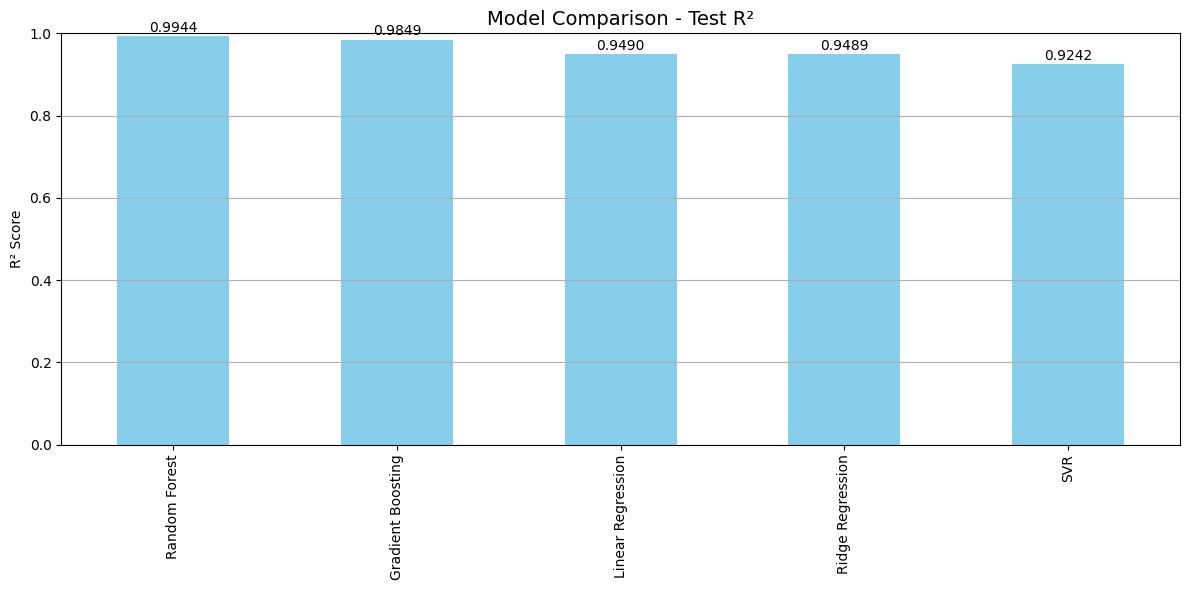

In [111]:
plt.figure(figsize=(12, 6))
ax = results_df['Test R²'].plot(kind='bar', color='skyblue')
plt.title('Model Comparison - Test R²', fontsize=14)
plt.ylabel('R² Score')
plt.ylim(0, 1)
plt.grid(axis='y')
for i, v in enumerate(results_df['Test R²']):
    ax.text(i, v + 0.01, f"{v:.4f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


In [114]:
best_model_name = results_df.index[0] #Since RF had the best accuracy and R²
best_model = results[best_model_name]['model']
best_test_r2 = results[best_model_name]['test_r2']
best_test_pred = results[best_model_name]['test_pred']

In [115]:
print(f"\nBest Model: {best_model_name}")
print(f"Test R²: {best_test_r2:.4f}")
print(f"Accuracy: {best_test_r2 * 100:.2f}%")


Best Model: Random Forest
Test R²: 0.9944
Accuracy: 99.44%


**Visualize Best Model Predictions**

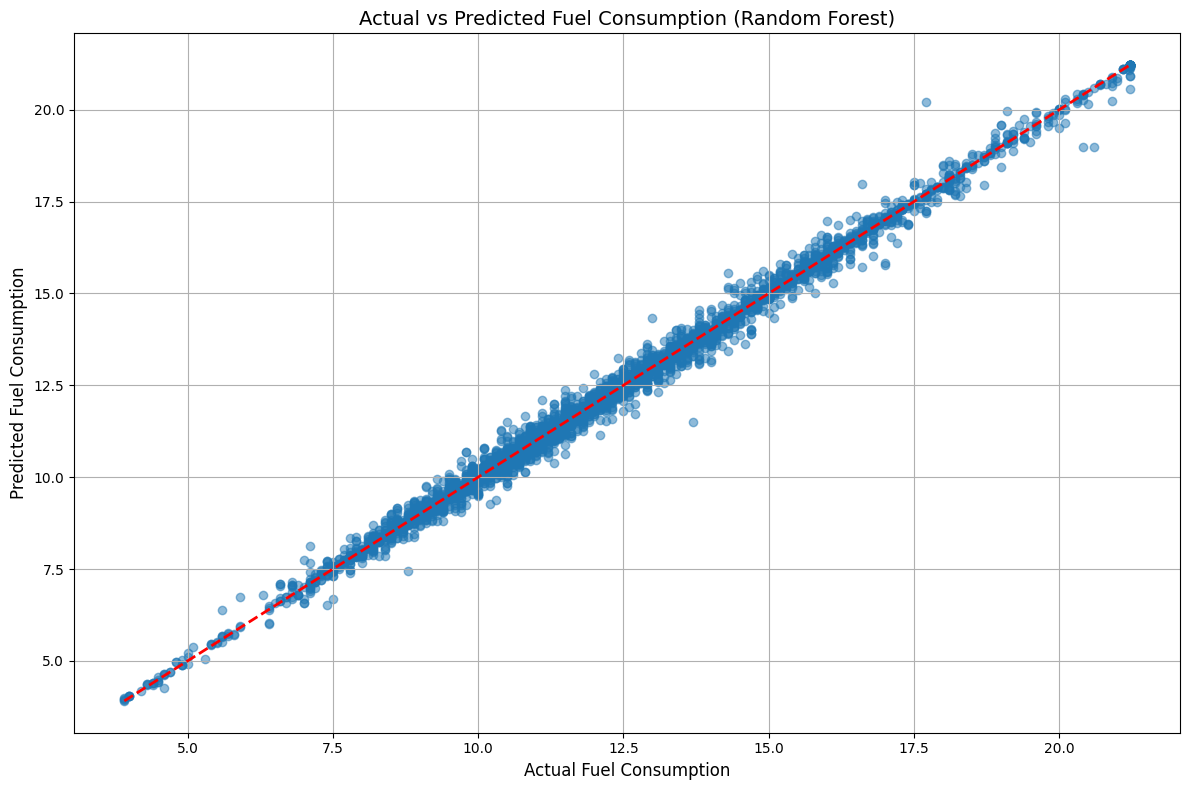

In [116]:
plt.figure(figsize=(12, 8))
plt.scatter(y_test, best_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Fuel Consumption', fontsize=12)
plt.ylabel('Predicted Fuel Consumption', fontsize=12)
plt.title(f'Actual vs Predicted Fuel Consumption ({best_model_name})', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

**Plot residuals**

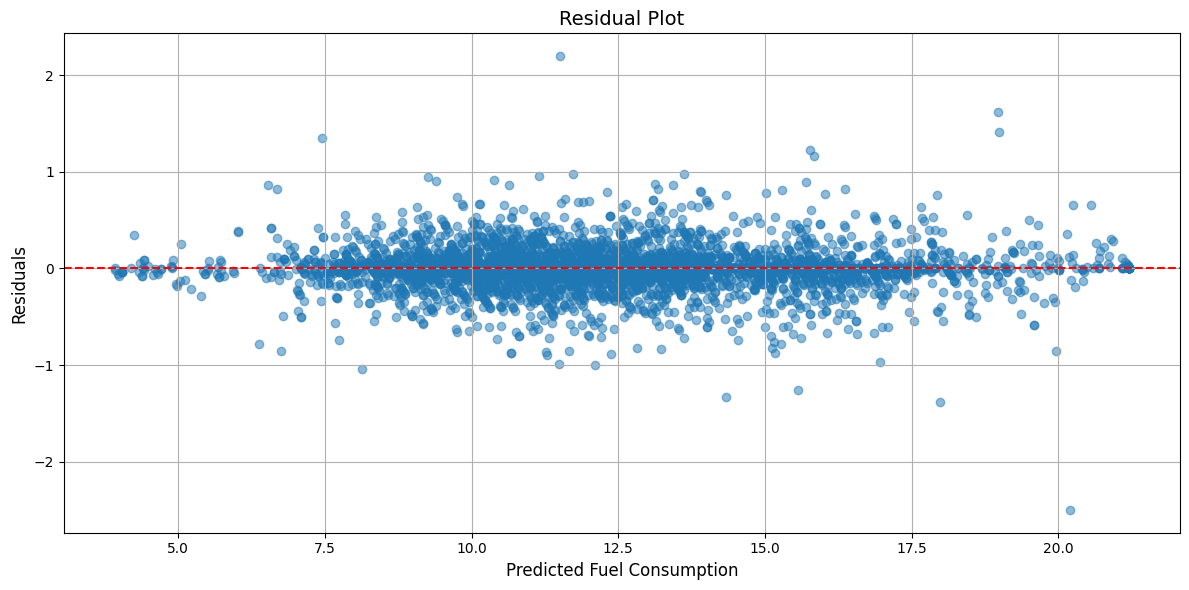

In [117]:
residuals = y_test - best_test_pred
plt.figure(figsize=(12, 6))
plt.scatter(best_test_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Fuel Consumption', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Residual Plot', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

**Distribution of residuals**

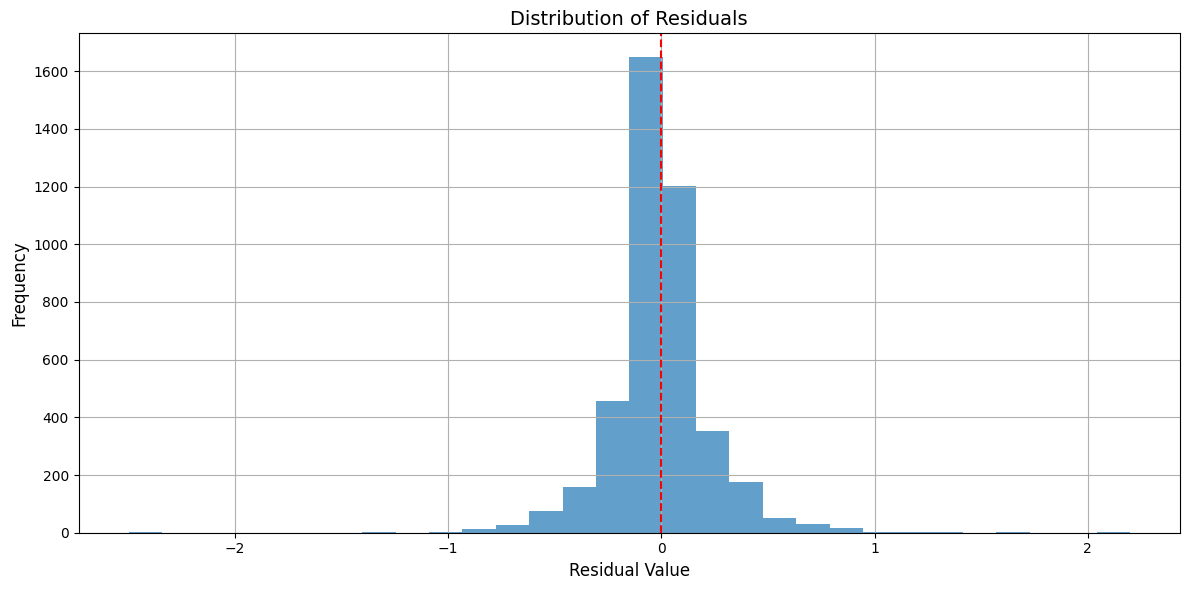

In [118]:
plt.figure(figsize=(12, 6))
plt.hist(residuals, bins=30, alpha=0.7)
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('Residual Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Residuals', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

# **Adding Advanced Model - XGBoost**

---

In [120]:
xgb_model = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=7,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.001,
    reg_lambda=1,
    random_state=42
)

**Train the model 🚀**

In [122]:
try:
    xgb_model.fit(
        X_train, y_train,
        eval_set=[(X_test, y_test)],
        early_stopping_rounds=50,
        verbose=100
    )
except TypeError as e:
    print(f"Error with early_stopping_rounds: {e}")
    # Alternative approach - some versions use callbacks instead
    try:
        xgb_model.fit(
            X_train, y_train,
            eval_set=[(X_test, y_test)],
            verbose=100
        )
    except Exception as e:
        print(f"Additional error: {e}")
        # Simple fallback if all else fails
        print("Using basic fit method")
        xgb_model.fit(X_train, y_train)

Error with early_stopping_rounds: XGBModel.fit() got an unexpected keyword argument 'early_stopping_rounds'
[0]	validation_0-rmse:3.02931
[100]	validation_0-rmse:1.38092
[200]	validation_0-rmse:0.69770
[300]	validation_0-rmse:0.44110
[400]	validation_0-rmse:0.34368
[500]	validation_0-rmse:0.30481
[600]	validation_0-rmse:0.28460
[700]	validation_0-rmse:0.27279
[800]	validation_0-rmse:0.26601
[900]	validation_0-rmse:0.26124
[999]	validation_0-rmse:0.25805


**Evaluate XGBoost model**

In [124]:
xgb_train_pred = xgb_model.predict(X_train)
xgb_test_pred = xgb_model.predict(X_test)

In [125]:
xgb_train_rmse = np.sqrt(mean_squared_error(y_train, xgb_train_pred))
xgb_test_rmse = np.sqrt(mean_squared_error(y_test, xgb_test_pred))

In [126]:
xgb_train_r2 = r2_score(y_train, xgb_train_pred)
xgb_test_r2 = r2_score(y_test, xgb_test_pred)

In [127]:
print(f"  Training RMSE: {xgb_train_rmse:.4f}")
print(f"  Testing RMSE: {xgb_test_rmse:.4f}")
print(f"  Training R²: {xgb_train_r2:.4f}")
print(f"  Testing R²: {xgb_test_r2:.4f}")
print(f"  Accuracy: {xgb_test_r2 * 100:.2f}%")

  Training RMSE: 0.2180
  Testing RMSE: 0.2581
  Training R²: 0.9950
  Testing R²: 0.9929
  Accuracy: 99.29%


**Visualize XGBoost predictions**

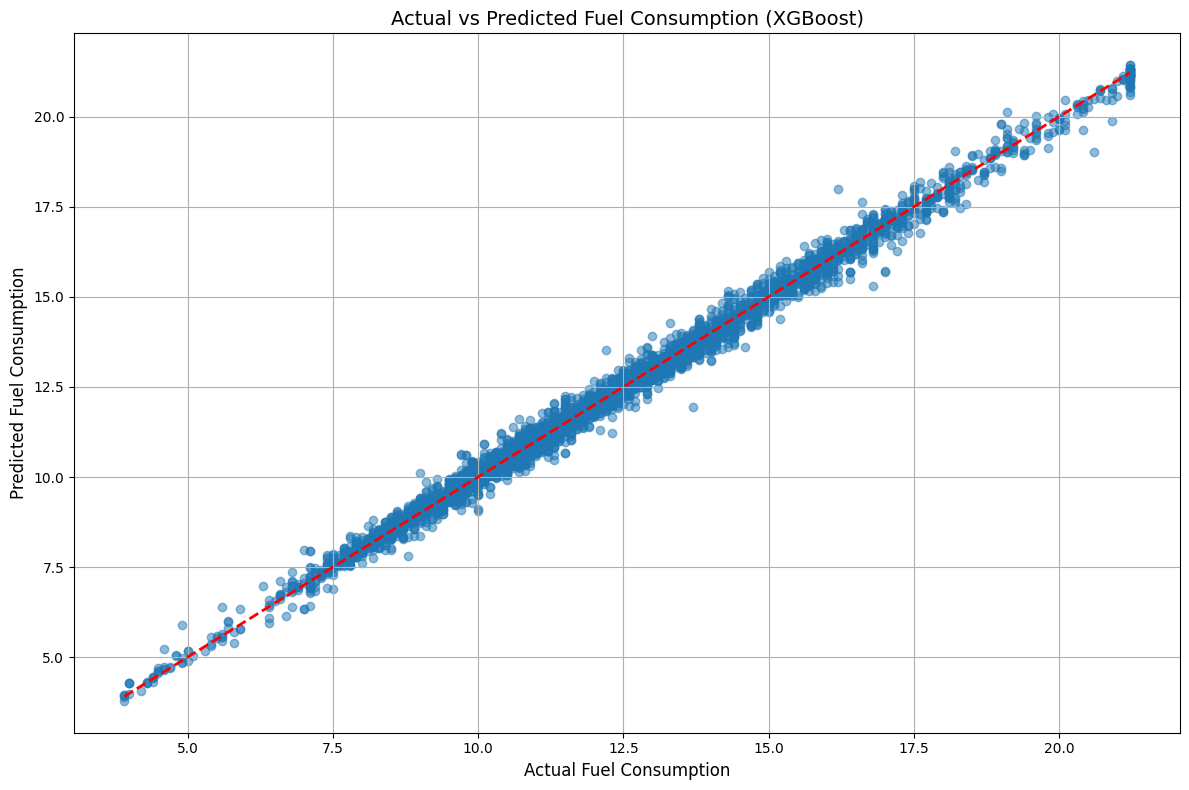

In [128]:
plt.figure(figsize=(12, 8))
plt.scatter(y_test, xgb_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Fuel Consumption', fontsize=12)
plt.ylabel('Predicted Fuel Consumption', fontsize=12)
plt.title('Actual vs Predicted Fuel Consumption (XGBoost)', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

**Get XGBoost feature importance**

In [130]:
xgb_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)

**Visualize XGBoost feature importance**

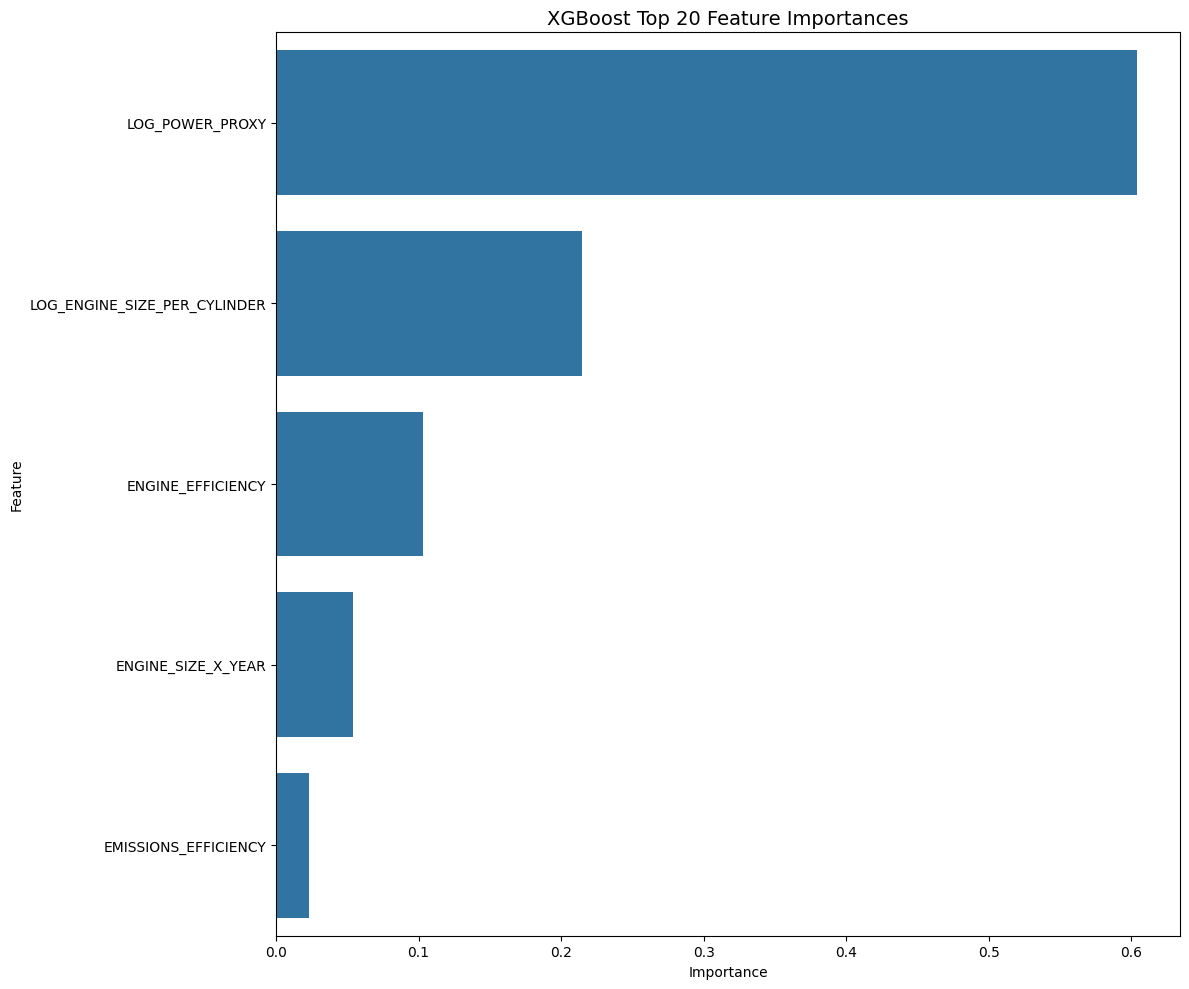

In [131]:
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=xgb_importance.head(20))
plt.title('XGBoost Top 20 Feature Importances', fontsize=14)
plt.tight_layout()
plt.show()

# **Adding Advanced Model - Neural Network 🧠**
---

**Scale the features for Neural Network**

In [133]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**train the Neural Network 🚀**

In [134]:
nn_model = MLPRegressor(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    alpha=0.001,
    batch_size='auto',
    learning_rate='adaptive',
    max_iter=1000,
    random_state=42,
    verbose=True
)

In [135]:
nn_model.fit(X_train_scaled, y_train)

Iteration 1, loss = 38.32376333
Iteration 2, loss = 3.67614930
Iteration 3, loss = 1.56153279
Iteration 4, loss = 0.67479380
Iteration 5, loss = 0.27886240
Iteration 6, loss = 0.14602697
Iteration 7, loss = 0.10866309
Iteration 8, loss = 0.09484402
Iteration 9, loss = 0.08704333
Iteration 10, loss = 0.08186063
Iteration 11, loss = 0.07844052
Iteration 12, loss = 0.07470606
Iteration 13, loss = 0.07303889
Iteration 14, loss = 0.07142518
Iteration 15, loss = 0.07068965
Iteration 16, loss = 0.06858246
Iteration 17, loss = 0.06768874
Iteration 18, loss = 0.06734906
Iteration 19, loss = 0.06555286
Iteration 20, loss = 0.06556312
Iteration 21, loss = 0.06393995
Iteration 22, loss = 0.06379883
Iteration 23, loss = 0.06265752
Iteration 24, loss = 0.06159290
Iteration 25, loss = 0.06108218
Iteration 26, loss = 0.06106126
Iteration 27, loss = 0.06088056
Iteration 28, loss = 0.06025736
Iteration 29, loss = 0.06007764
Iteration 30, loss = 0.05929999
Iteration 31, loss = 0.05890256
Iteration 32, lo

MLPRegressor(alpha=0.001, hidden_layer_sizes=(100, 50),
             learning_rate='adaptive', max_iter=1000, random_state=42,
             verbose=True)

**Evaluate Neural Network**

In [136]:
nn_train_pred = nn_model.predict(X_train_scaled)
nn_test_pred = nn_model.predict(X_test_scaled)

In [137]:
nn_train_rmse = np.sqrt(mean_squared_error(y_train, nn_train_pred))
nn_test_rmse = np.sqrt(mean_squared_error(y_test, nn_test_pred))

In [138]:
nn_train_r2 = r2_score(y_train, nn_train_pred)
nn_test_r2 = r2_score(y_test, nn_test_pred)

In [139]:
print(f"  Training RMSE: {nn_train_rmse:.4f}")
print(f"  Testing RMSE: {nn_test_rmse:.4f}")
print(f"  Training R²: {nn_train_r2:.4f}")
print(f"  Testing R²: {nn_test_r2:.4f}")
print(f"  Accuracy: {nn_test_r2 * 100:.2f}%")

  Training RMSE: 0.3050
  Testing RMSE: 0.3148
  Training R²: 0.9901
  Testing R²: 0.9894
  Accuracy: 98.94%


**Visualize Neural Network predictions**

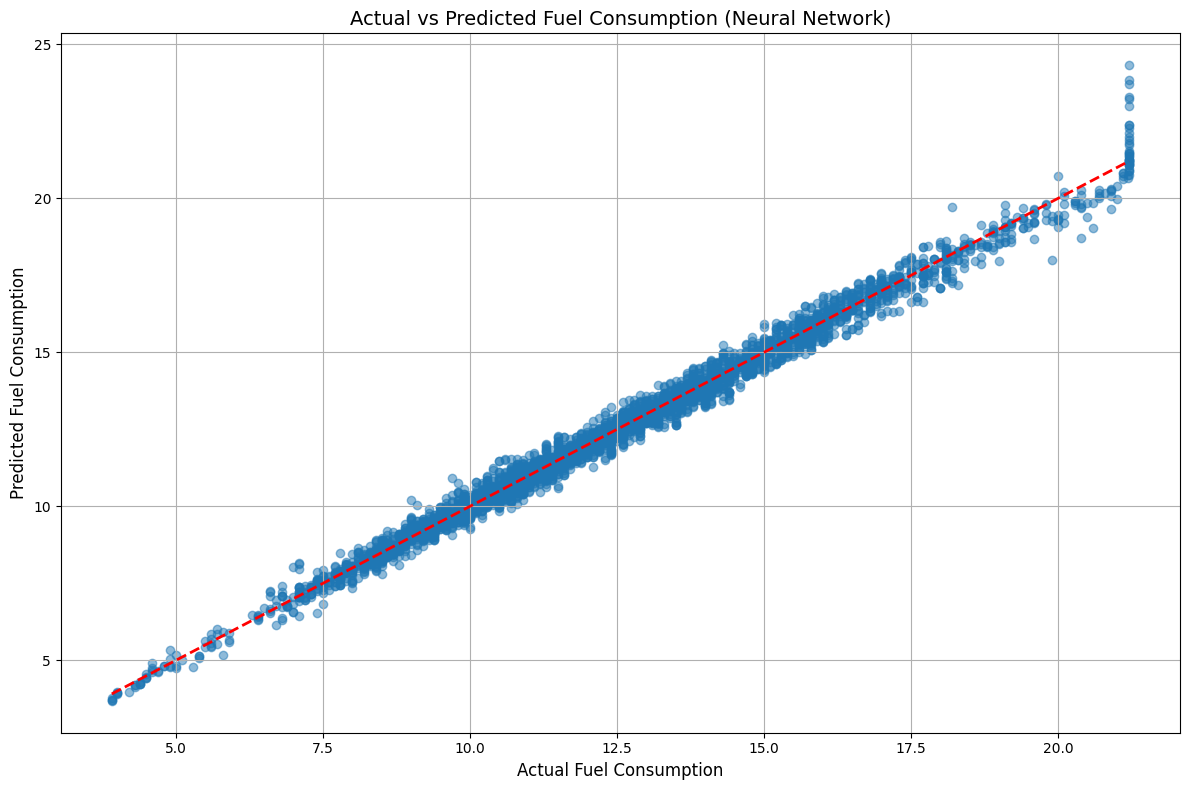

In [140]:
plt.figure(figsize=(12, 8))
plt.scatter(y_test, nn_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Fuel Consumption', fontsize=12)
plt.ylabel('Predicted Fuel Consumption', fontsize=12)
plt.title('Actual vs Predicted Fuel Consumption (Neural Network)', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

# **Model Comparison and Final Results 📝**

---

In [141]:
all_models = {
    'Base - Random Forest': {
        'train_rmse': results['Random Forest']['train_rmse'],
        'test_rmse': results['Random Forest']['test_rmse'],
        'train_r2': results['Random Forest']['train_r2'],
        'test_r2': results['Random Forest']['test_r2']
    },
    'Base - Gradient Boosting': {
        'train_rmse': results['Gradient Boosting']['train_rmse'],
        'test_rmse': results['Gradient Boosting']['test_rmse'],
        'train_r2': results['Gradient Boosting']['train_r2'],
        'test_r2': results['Gradient Boosting']['test_r2']
    },
    'XGBoost': {
        'train_rmse': xgb_train_rmse,
        'test_rmse': xgb_test_rmse,
        'train_r2': xgb_train_r2,
        'test_r2': xgb_test_r2
    },
    'Neural Network': {
        'train_rmse': nn_train_rmse,
        'test_rmse': nn_test_rmse,
        'train_r2': nn_train_r2,
        'test_r2': nn_test_r2
    }
}

In [142]:
comparison_df = pd.DataFrame({
    model_name: {
        'Test R²': model_results['test_r2'],
        'Test RMSE': model_results['test_rmse'],
        'Train R²': model_results['train_r2'],
        'Train RMSE': model_results['train_rmse'],
        'Accuracy (%)': model_results['test_r2'] * 100
    }
    for model_name, model_results in all_models.items()
}).T

**Sort by test R²**

In [143]:
comparison_df = comparison_df.sort_values('Test R²', ascending=False)

In [144]:
comparison_df

,Test R²,Test RMSE,Train R²,Train RMSE,Accuracy (%)
Base - Random Forest,0.994367,0.229528,0.998358,0.124363,99.436659
XGBoost,0.992879,0.258055,0.994956,0.217982,99.287931
Neural Network,0.989400,0.314844,0.990124,0.305000,98.940037
Base - Gradient Boosting,0.984880,0.376039,0.985541,0.369045,98.487954


**Visualize model comparison**

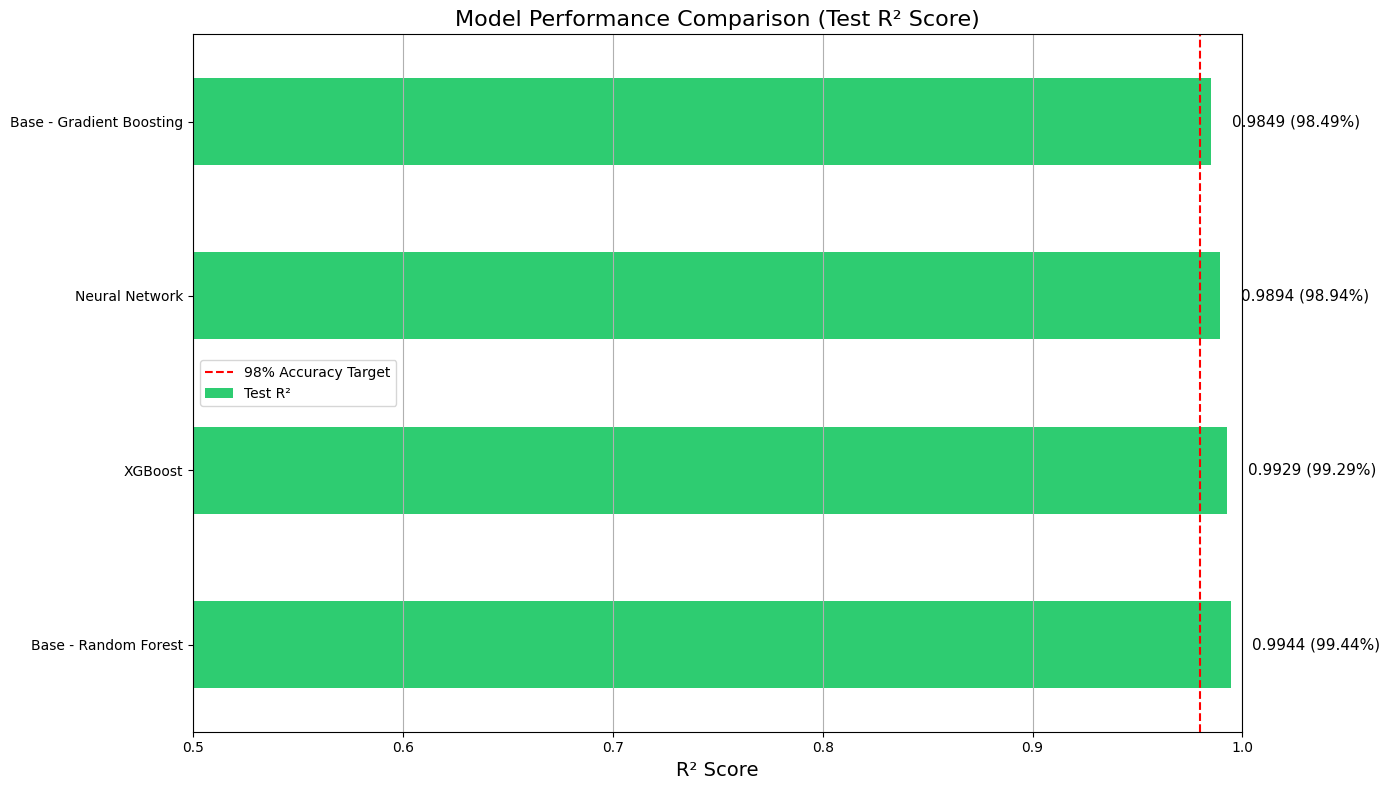

In [148]:
plt.figure(figsize=(14, 8))
bar_colors = ['#2ecc71' if x >= 0.95 else '#3498db' if x >= 0.9 else '#f39c12' for x in comparison_df['Test R²']]
ax = comparison_df['Test R²'].plot(kind='barh', color=bar_colors)
plt.title('Model Performance Comparison (Test R² Score)', fontsize=16)
plt.xlabel('R² Score', fontsize=14)
plt.axvline(x=0.98, color='r', linestyle='--', label='98% Accuracy Target')
plt.xlim(0.5, 1.0)
plt.legend()
plt.grid(axis='x')
for i, v in enumerate(comparison_df['Test R²']):
    ax.text(v + 0.01, i, f"{v:.4f} ({comparison_df['Accuracy (%)'].iloc[i]:.2f}%)", va='center', fontsize=11)

plt.tight_layout()
plt.show()

In [149]:
best_model_name = comparison_df.index[0]
best_accuracy = comparison_df.loc[best_model_name, 'Accuracy (%)']

In [150]:
print(f"Best Model: {best_model_name}")
print(f"Best Accuracy: {best_accuracy:.2f}%")
print(f"Best R² Score: {comparison_df.loc[best_model_name, 'Test R²']:.4f}")
print(f"Best RMSE: {comparison_df.loc[best_model_name, 'Test RMSE']:.4f}")

Best Model: Base - Random Forest
Best Accuracy: 99.44%
Best R² Score: 0.9944
Best RMSE: 0.2295


**Hyperparameter Tuning for the Best Model**

In [152]:
param_dist = {
        'n_estimators': np.arange(100, 1000, 100),
        'max_depth': np.arange(5, 30, 5),
        'min_samples_split': np.arange(2, 20, 2),
        'min_samples_leaf': np.arange(1, 10),
        'max_features': ['auto', 'sqrt', 'log2']
}


In [153]:
base_model = RandomForestRegressor(random_state=42)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
21 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_


Best Parameters:
  n_estimators: 800
  min_samples_split: 2
  min_samples_leaf: 2
  max_features: sqrt
  max_depth: 15

Best R² Score: 0.9907
Best Accuracy: 99.07%

Tuned Model Performance:
  Training RMSE: 0.1927
  Testing RMSE: 0.2730
  Training R²: 0.9961
  Testing R²: 0.9920
  Accuracy: 99.20%


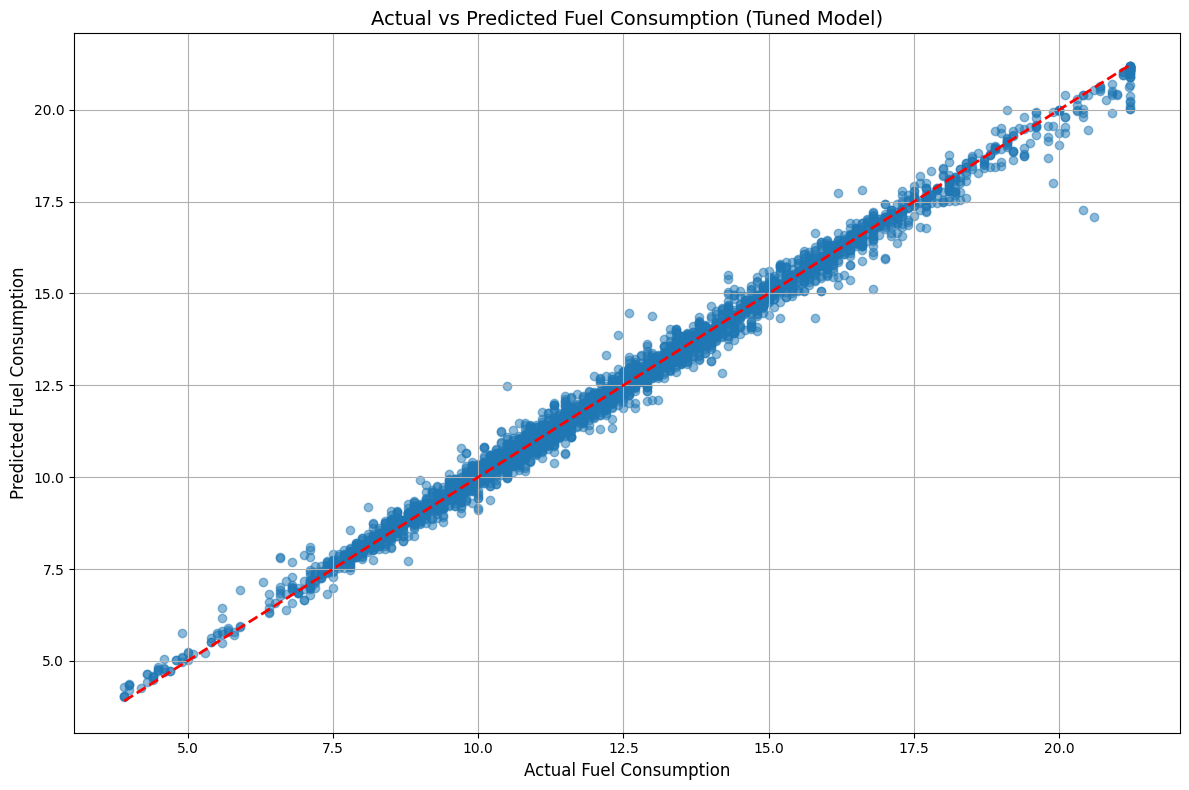

In [154]:
if base_model is not None:
    # Create RandomizedSearchCV
    n_iter = 20  # Number of parameter settings to try

    tuning = RandomizedSearchCV(
        base_model,
        param_distributions=param_dist,
        n_iter=n_iter,
        scoring='r2',
        cv=3,
        verbose=2,
        random_state=42,
        n_jobs=-1
    )

    # Fit the tuning
    tuning.fit(X_train, y_train)

    # Print best parameters and score
    print("\nBest Parameters:")
    for param, value in tuning.best_params_.items():
        print(f"  {param}: {value}")

    print(f"\nBest R² Score: {tuning.best_score_:.4f}")
    print(f"Best Accuracy: {tuning.best_score_ * 100:.2f}%")

    # Evaluate the tuned model on test data
    best_tuned_model = tuning.best_estimator_
    tuned_train_pred = best_tuned_model.predict(X_train)
    tuned_test_pred = best_tuned_model.predict(X_test)

    tuned_train_rmse = np.sqrt(mean_squared_error(y_train, tuned_train_pred))
    tuned_test_rmse = np.sqrt(mean_squared_error(y_test, tuned_test_pred))

    tuned_train_r2 = r2_score(y_train, tuned_train_pred)
    tuned_test_r2 = r2_score(y_test, tuned_test_pred)

    print("\nTuned Model Performance:")
    print(f"  Training RMSE: {tuned_train_rmse:.4f}")
    print(f"  Testing RMSE: {tuned_test_rmse:.4f}")
    print(f"  Training R²: {tuned_train_r2:.4f}")
    print(f"  Testing R²: {tuned_test_r2:.4f}")
    print(f"  Accuracy: {tuned_test_r2 * 100:.2f}%")

    # Visualize tuned model predictions
    plt.figure(figsize=(12, 8))
    plt.scatter(y_test, tuned_test_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Fuel Consumption', fontsize=12)
    plt.ylabel('Predicted Fuel Consumption', fontsize=12)
    plt.title('Actual vs Predicted Fuel Consumption (Tuned Model)', fontsize=14)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# **Save the Best Model ✅**

---

In [157]:
joblib.dump(best_tuned_model, 'best_model.joblib')

['best_model.joblib']

**Save feature list**

In [159]:
with open('selected_features.txt', 'w') as f:
    for feature in selected_features:
        f.write(f"{feature}\n")

# **Model Deployment 👩‍💻**

----
**Predicted fuel consumption values.**

In [177]:
def predict_fuel_consumption(input_data, model_file=f'/content/best_model.joblib'):
    model = joblib.load(model_file)
    # Get the correct order of features from the trained model
    feature_order = model.feature_names_in_
    # Create the input DataFrame with the correct feature order
    input_df = pd.DataFrame(input_data, columns=feature_order)
    predictions = model.predict(input_df)
    return predictions

In [178]:
data = {
    'EMISSIONS_EFFICIENCY': [200],
    'ENGINE_EFFICIENCY': [15],
    'ENGINE_SIZE_X_YEAR': [30],
    'LOG_ENGINE_SIZE_PER_CYLINDER': [1.1],
    'LOG_POWER_PROXY': [2.5]
}

In [179]:
predictions = predict_fuel_consumption(data)
print("Predicted fuel consumption:", predictions)

Predicted fuel consumption: [15.45720219]


# **Summary 🧾**

----

**Dataset summary**

In [180]:
print(f"Dataset Size: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"Features Used: {X_selected.shape[1]} (after selection)")
print(f"Training Set: {X_train.shape[0]} samples")
print(f"Testing Set: {X_test.shape[0]} samples")

Dataset Size: 22556 rows, 40 columns
Features Used: 5 (after selection)
Training Set: 16910 samples
Testing Set: 4228 samples


**Best model performance**

In [182]:
print(f"Model: {best_model_name}")
print(f"R² Score: {comparison_df.loc[best_model_name, 'Test R²']:.4f}")
print(f"RMSE: {comparison_df.loc[best_model_name, 'Test RMSE']:.4f}")
print(f"Accuracy: {comparison_df.loc[best_model_name, 'Accuracy (%)']:.2f}%")

Model: Base - Random Forest
R² Score: 0.9944
RMSE: 0.2295
Accuracy: 99.44%


**tuned model**

In [184]:
if 'tuned_test_r2' in locals():
    improvement = (tuned_test_r2 - comparison_df.loc[best_model_name, 'Test R²']) * 100
    print(f"Improvement after tuning: {improvement:.2f}% better R² score")
    print(f"Final Tuned Model Accuracy: {tuned_test_r2 * 100:.2f}%")

Improvement after tuning: -0.23% better R² score
Final Tuned Model Accuracy: 99.20%


**Performance across different vehicle classes**

In [195]:
if 'VEHICLE_CLASS' in df.columns:
    class_performance = {}
    for vclass in df['VEHICLE_CLASS'].unique():
        # Get indices for this class in the test set
        indices = df.loc[y_test.index, 'VEHICLE_CLASS'] == vclass
        if sum(indices) > 0:
            # Get predictions and actual values for this class
            if 'tuned_test_pred' in locals():
                pred = tuned_test_pred[indices]
            else:
                best_preds = globals()[f"{best_model_name.lower().replace(' ', '_').replace('-', '_')}_test_pred"]
                pred = best_preds[indices]

            actual = y_test[indices]

            # Calculate metrics
            class_r2 = r2_score(actual, pred)
            class_rmse = np.sqrt(mean_squared_error(actual, pred))

            class_performance[vclass] = {
                'r2': class_r2,
                'rmse': class_rmse,
                'count': sum(indices)
            }

    # Display for top 5 classes by count
    top_classes = sorted(class_performance.items(), key=lambda x: x[1]['count'], reverse=True)[:5]
    for vclass, metrics in top_classes:
        print(f"  {vclass} (n={metrics['count']}): R²={metrics['r2']:.4f}, RMSE={metrics['rmse']:.4f}")


  COMPACT (n=503): R²=0.9894, RMSE=0.2547
  SUV (n=475): R²=0.9878, RMSE=0.3096
  MID-SIZE (n=437): R²=0.9918, RMSE=0.2733
  SUBCOMPACT (n=306): R²=0.9916, RMSE=0.2314
  PICKUP TRUCK - STANDARD (n=279): R²=0.9846, RMSE=0.2407


**Performance by year**

In [196]:
for year in sorted(df['YEAR'].unique())[-5:]:  # Last 5 years
    # Get indices for this year in the test set
    indices = df.loc[y_test.index, 'YEAR'] == year
    if sum(indices) > 0:
        # Get predictions and actual values for this year
        if 'tuned_test_pred' in locals():
            pred = tuned_test_pred[indices]
        else:
            best_preds = globals()[f"{best_model_name.lower().replace(' ', '_').replace('-', '_')}_test_pred"]
            pred = best_preds[indices]

        actual = y_test[indices]

        # Calculate metrics
        year_r2 = r2_score(actual, pred)
        year_rmse = np.sqrt(mean_squared_error(actual, pred))

        print(f"  {year} (n={sum(indices)}): R²={year_r2:.4f}, RMSE={year_rmse:.4f}")
        print("---" * 20)

  2018 (n=198): R²=0.9913, RMSE=0.2600
------------------------------------------------------------
  2019 (n=221): R²=0.9884, RMSE=0.3326
------------------------------------------------------------
  2020 (n=175): R²=0.9903, RMSE=0.2592
------------------------------------------------------------
  2021 (n=176): R²=0.9952, RMSE=0.2143
------------------------------------------------------------
  2022 (n=177): R²=0.9896, RMSE=0.3540
------------------------------------------------------------
